# Our first look at data

In [1]:
data=read.csv('D:/desktop/dataR/femaleMiceWeights.csv',1)
head(data)

,Diet,Bodyweight
,<chr>,<dbl>
1,chow,21.51
2,chow,28.14
3,chow,24.04
4,chow,23.45
5,chow,23.68
6,chow,19.79


In [2]:
library(dplyr)
control <- filter(data,Diet=="chow") %>% select(Bodyweight) %>% unlist
treatment <- filter(data,Diet=="hf") %>% select(Bodyweight) %>% unlist


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
print( mean(treatment) )

[1] 26.83417


In [4]:
obsdiff <- mean(treatment) - mean(control)
print(obsdiff)

[1] 3.020833


# Random Variables

In [5]:
library(downloader)
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extdata/\
femaleControlsPopulation.csv"
filename <- "femaleControlsPopulation.csv"
if (!file.exists(filename)) download(url,destfile=filename)

In [6]:
population <- read.csv(filename)
population <- unlist(population)

In [7]:
control <- sample(population,12)
mean(control)

[1] 23.3375

In [8]:
control <- sample(population,12)
mean(control)

[1] 22.67083

In [9]:
control <- sample(population,12)
mean(control)

[1] 25.72417

The Null Hypothesis

In [10]:
control <- sample(population,12)
##another 12 control mice that we act as if they were not
treatment <- sample(population,12)
print(mean(treatment) - mean(control))

[1] -2.768333


In [11]:
n <- 10000
null <- vector("numeric",n)
for (i in 1:n) {
control <- sample(population,12)
treatment <- sample(population,12)
null[i] <- mean(treatment) - mean(control)
}

In [12]:
mean(null >= obsdiff)

[1] 0.0117

# Distributions

In [13]:
library(UsingR)
head(father.son)

Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'UsingR'


The following object is masked from 'package:survival':

    cancer




,fheight,sheight
,<dbl>,<dbl>
1,65.04851,59.77827
2,63.25094,63.21404
3,64.95532,63.34242
4,65.75250,62.79238
5,61.13723,64.28113
6,63.02254,64.24221


In [14]:
x <- father.son$fheight
round(sample(x,10),1)

[1] 65.8 68.0 69.9 68.7 64.3 71.0 68.4 64.6 67.2 70.1

Cumulative Distribution Function

CDF $F(a)\equiv Pr(x\le a)$

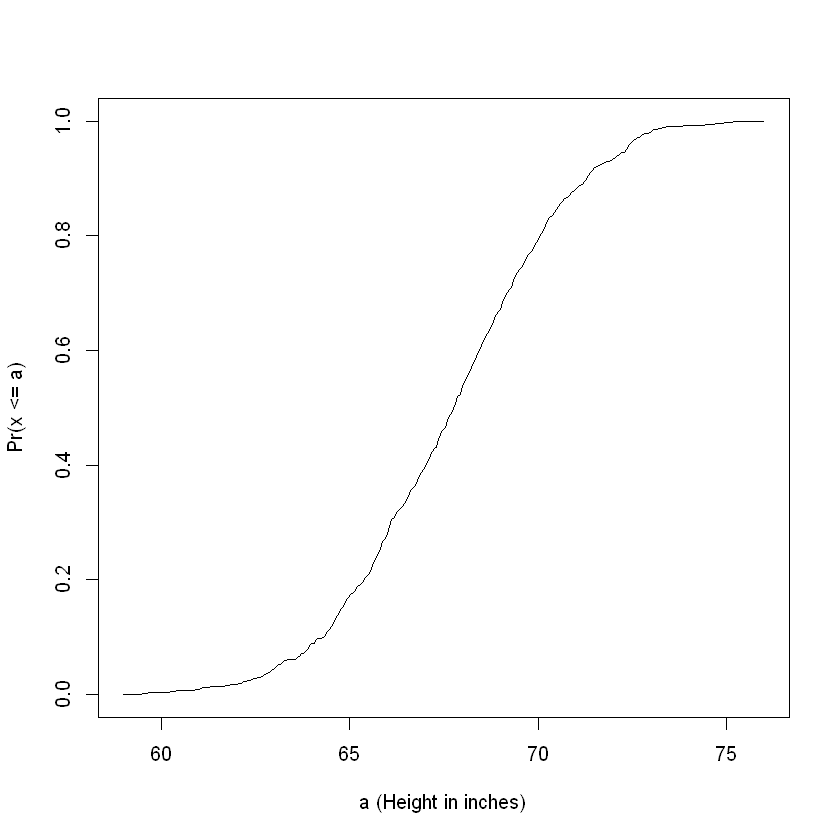

In [15]:
smallest <- floor( min(x) )
largest <- ceiling( max(x) )
values <- seq(smallest, largest,len=300)
heightecdf <- ecdf(x)
plot(values, heightecdf(values), type="l",
xlab="a (Height in inches)",ylab="Pr(x <= a)")

Histograms

$Pr(a\le x\le b)=F(b)-F(a)$

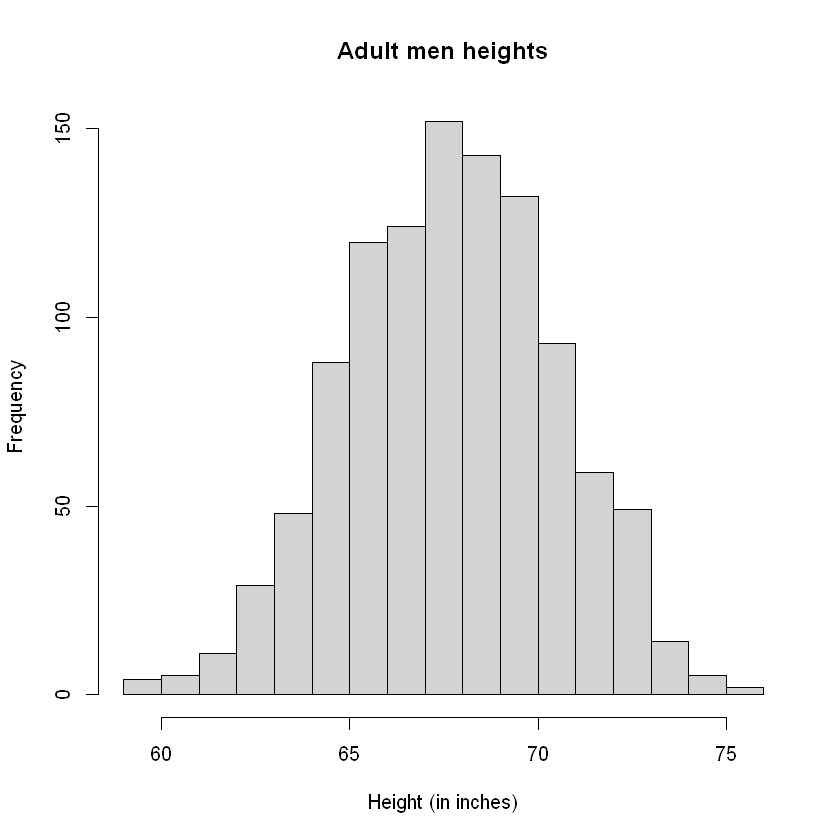

In [16]:
bins <- seq(smallest, largest)
hist(x,breaks=bins,xlab="Height (in inches)",main="Adult men heights")

# Probability Distribution

$Pr(a\le X\le b)=F(b)-F(a)$

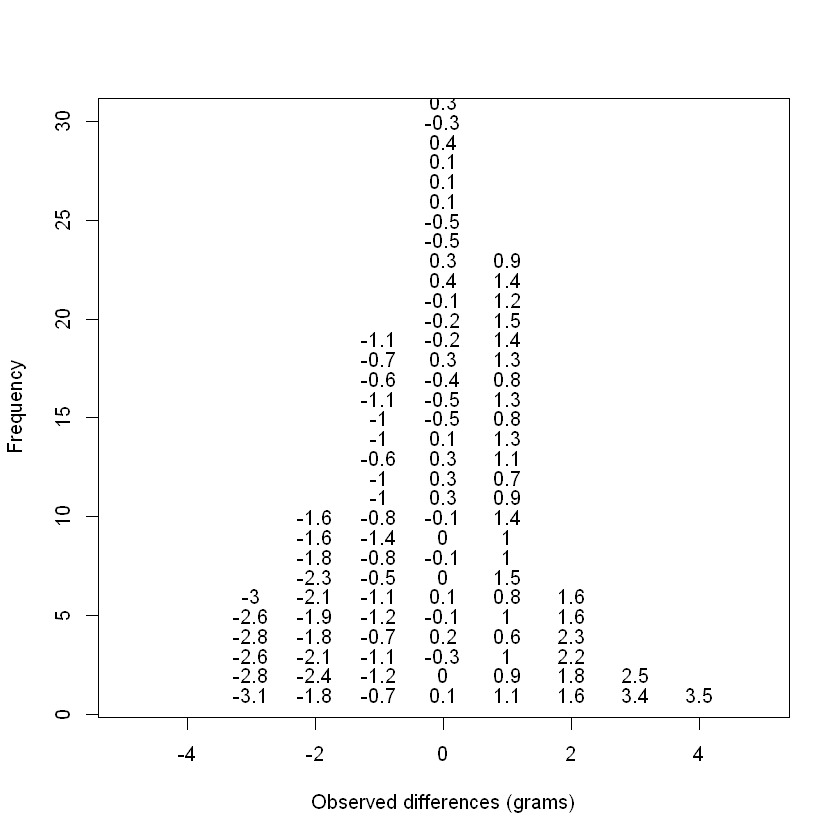

In [17]:
n <- 100
library(rafalib)
nullplot(-5,5,1,30, xlab="Observed differences (grams)", ylab="Frequency")
totals <- vector("numeric",11)
for (i in 1:n) {
control <- sample(population,12)
treatment <- sample(population,12)
nulldiff <- mean(treatment) - mean(control)
j <- pmax(pmin(round(nulldiff)+6,11),1)
totals[j] <- totals[j]+1
text(j-6,totals[j],pch=15,round(nulldiff,1))
##if(i < 15) Sys.sleep(1) ##You can add this line to see values appear slowly
}

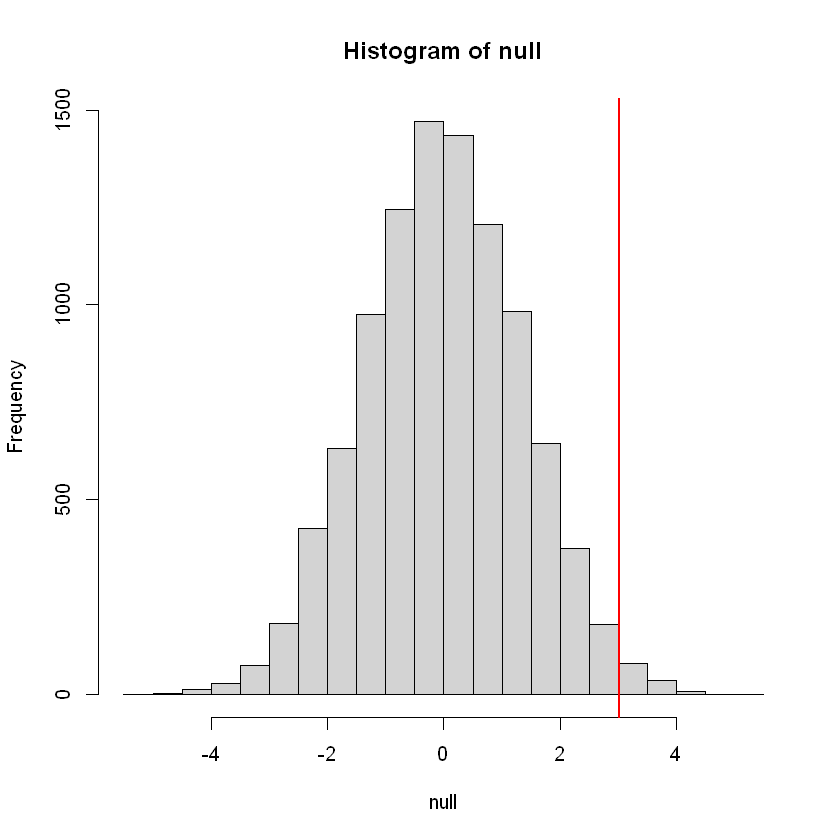

In [18]:
hist(null, freq=TRUE)
abline(v=obsdiff, col="red", lwd=2)

Normal Distribution

$$Pr(a\lt x\lt b)=\int_a^b\frac{1}{\sqrt{2\pi \sigma^2}}exp(\frac{-(x-\mu)^2}{2\sigma^2})dx$$

In [19]:
1 - pnorm(obsdiff,mean(null),sd(null))

[1] 0.01217585

In [1]:
x=read.csv('D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\femaleControlsPopulation.csv')

In [2]:
head(x)

,Bodyweight
,<dbl>
1,27.03
2,24.80
3,27.02
4,28.07
5,23.55
6,22.72


Q1:What is the average of these weights?

In [3]:
mean(x$Bodyweight)

[1] 23.89338

Q2:After setting the seed at 1, set.seed(1) take a random sample of size 5. What is the absolute value (use abs) of the difference 
between the average of the sample and the average of all the values?

In [5]:
set.seed(1)
sam=sample(x$Bodyweight,size=5)
diff=abs(mean(sam)-mean(x$Bodyweight))
diff

[1] 0.3293778

Q3:After setting the seed at 5, set.seed(5) take a random sample of size 5. What is the absolute
value of the difference between the average of the sample and the average of all the values?

In [6]:
set.seed(5)
sam=sample(x$Bodyweight,size=5)
diff=abs(mean(sam)-mean(x$Bodyweight))
diff

[1] 0.3813778

Q4:Why are the answers from 2 and 3 different?
• A) Because we made a coding mistake.
• B) Because the average of the x is random.
• C) Because the average of the samples is a random variable.
• D) All of the above.
A

Q5:Set the seed at 1, then using a for-loop take a random sample of 5 mice 1,000 times. Save these averages. What percent of these 1,000 averages are more than 1 ounce away from the average of x ?

In [11]:
k=0
set.seed(1)
for (i in 1:1000){
    a=sample(x$Bodyweight,size=5)
    b=mean(a)
    if(abs(b-mean(x$Bodyweight))>1){k=k+1}
}
percentage1=k/1000*100
percentage1

[1] 50.3

Q6:We are now going to increase the number of times we redo the sample from 1,000 to 10,000.
Set the seed at 1, then using a for-loop take a random sample of 5 mice 10,000 times. Save these
averages. What percent of these 10,000 averages are more than 1 ounce away from the average
of x ?

In [9]:
k=0
set.seed(1)
for (i in 1:10000){
    a=sample(x$Bodyweight,size=5)
    b=mean(a)
    if(abs(b-mean(x$Bodyweight))>1){k=k+1}
}
percentage=k/10000*100
percentage

[1] 50.84

Q7:Note that the answers to 4 and 5 barely changed. This is expected. The way we think about the
random value distributions is as the distribution of the list of values obtained if we repeated the
experiment an infinite number of times. On a computer, we can’t perform an infinite number
of iterations so instead, for our examples, we consider 1,000 to be large enough, thus 10,000 is
Inference as well. Now if instead we change the sample size, then we change the random variable and
thus its distribution. Set the seed at 1, then using a for-loop take a random sample of 50 mice 1,000 times. Save these
averages. What percent of these 1,000 averages are more than 1 ounce away from the average of x ?

In [10]:
k=0
set.seed(1)
for (i in 1:1000){
    a=sample(x$Bodyweight,size=50)
    b=mean(a)
    if(abs(b-mean(x$Bodyweight))>1){k=k+1}
}
percentage=k/1000*100
percentage

[1] 1.4

Q8:Use a histogram to “look” at the distribution of averages we get with a sample size of 5 and a
sample size of 50. How would you say they differ?
• A) They are actually the same.
• B) They both look roughly normal, but with a sample size of 50 the spread is smaller.
• C) They both look roughly normal, but with a sample size of 50 the spread is larger.
• D) The second distribution does not look normal at all.

B

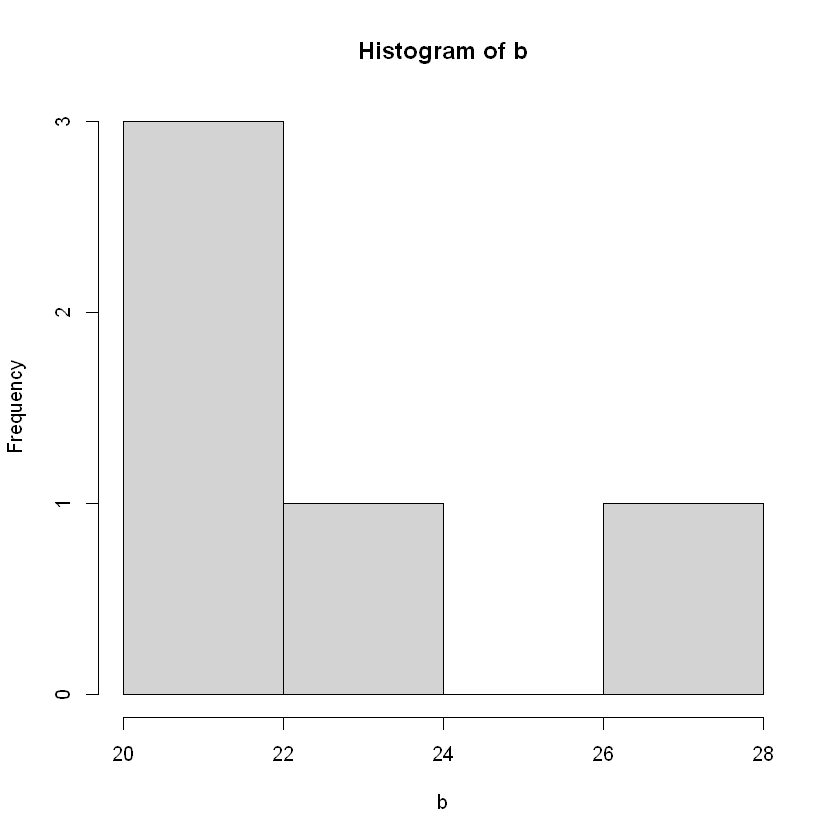

In [14]:
set.seed(1)
b=numeric()
for (i in 1:1000){
    a=sample(x$Bodyweight,size=5)
    b[i]=mean(a[i])
}
hist(b)

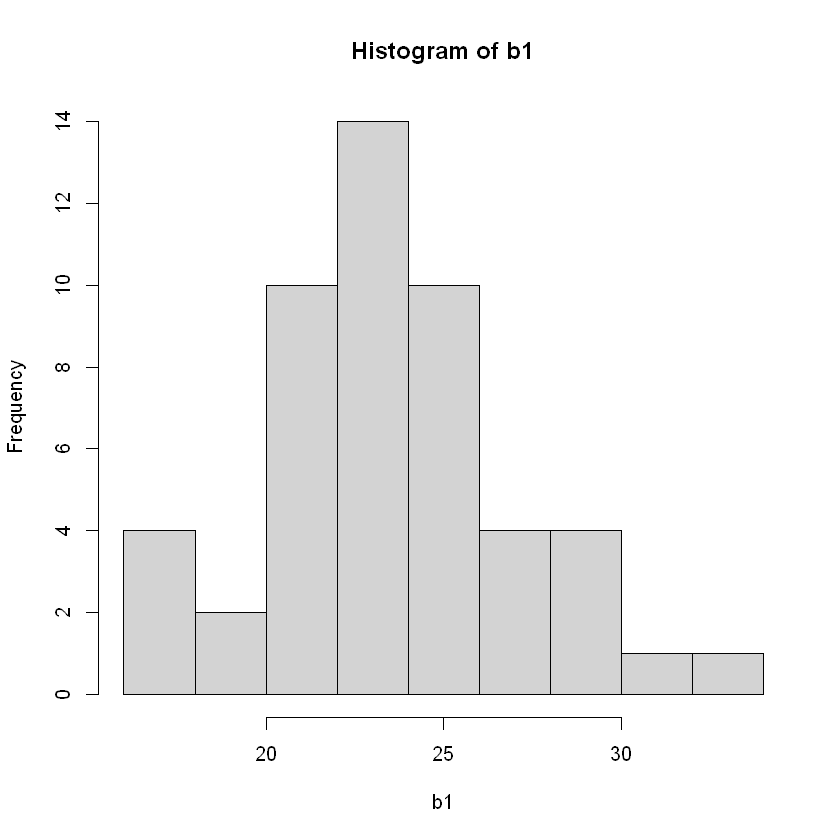

In [21]:
set.seed(1)
b1=numeric()
for (i in 1:1000){
    a=sample(x$Bodyweight,size=50)
    b1[i]=mean(a[i])
}
hist(b1)

Q9:For the last set of averages, the ones obtained from a sample size of 50, what percent are between 23 and 25?

In [25]:
length(which(b1>=23&b1<=25))/50*100

[1] 30

In [26]:
num=rnorm(50, 23.9,0.43)
length(which(num>=23&num<=25))/50*100

[1] 98

# Populations, Samples and Estimates

$\hat{X}=\frac{1}{M}\sum_{i=1}^\infty X_i, \hat{Y}=\frac{1}{N}\sum_{i=1}^\infty Y_i$

In [29]:
dat=read.csv("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\mice_pheno.csv")
dat <- na.omit( dat )

In [31]:
head(dat)

,Sex,Diet,Bodyweight
,<chr>,<chr>,<dbl>
1,F,hf,31.94
2,F,hf,32.48
3,F,hf,22.82
4,F,hf,19.92
5,F,hf,32.22
6,F,hf,27.50


Q1:Use dplyr to create a vector x with the body weight of all males on the control (chow) diet.
What is this population’s average?

In [33]:
library(dplyr)
dx=filter(dat, Sex =="M"& Diet =="chow")
mean(dx$Bodyweight)

[1] 30.96381

Q2:Now use the rafalib package and use the popsd function to compute the population standard deviation

In [35]:
library(rafalib)
popsd(dx$Bodyweight)

[1] 4.420501

Q3:Set the seed at 1. Take a random sample X of size 25 from x. What is the sample average?

In [36]:
set.seed(1)
aa=sample(dx$Bodyweight,size=25)
mean(aa)

[1] 30.5196

Q4:Use dplyr to create a vector y with the body weight of all males on the high fat (hf) diet. What is this population’s average?

In [37]:
dx1=filter(dat, Sex =="M"& Diet =="hf")
mean(dx1$Bodyweight)

[1] 34.84793

Q5:Now use the rafalib package and use the popsd function to compute the population standard
deviation.

In [38]:
popsd(dx1$Bodyweight)

[1] 5.574609

Q6:Set the seed at 1. Take a random sample Y of size 25 from y. What is the sample average?

In [39]:
set.seed(1)
bb=sample(dx1$Bodyweight,size=25)
mean(bb)

[1] 35.8036

Q7:What is the difference in absolute value between $\hat{y}-\hat{x}and \hat{X}-\hat{Y}$

In [43]:
abs((mean(aa)-mean(bb))-(mean(dx$Bodyweight)-mean(dx1$Bodyweight)))

[1] 1.399884

Q8:Repeat the above for females. Make sure to set the seed to 1 before each sample call. What is
the difference in absolute value between $\hat{y}-\hat{x}and \hat{X}-\hat{Y}$

In [45]:
dxa=filter(dat, Sex =="F"& Diet =="chow")
set.seed(1)
cc=sample(dxa$Bodyweight,size=25)
dxa1=filter(dat, Sex =="F"& Diet =="hf")
cc1=sample(dxa1$Bodyweight,size=25)
abs((mean(cc)-mean(cc1))-(mean(dxa$Bodyweight)-mean(dxa1$Bodyweight)))

[1] 0.4567172

Q9:For the females, our sample estimates were closer to the population difference than with males.
What is a possible explanation for this?
• A) The population variance of the females is smaller than that of the males; thus, the
sample variable has less variability.
• B) Statistical estimates are more precise for females.
• C) The sample size was larger for females.
• D) The sample size was smaller for females.
A

In [46]:
length(aa)
length(bb)
length(cc)
length(cc1)

[1] 25

[1] 25

[1] 25

[1] 25

In [49]:
var(filter(dat, Sex =="F")$Bodyweight)
var(filter(dat, Sex =="M")$Bodyweight)

[1] 19.72743

[1] 28.7136

# Central Limit Theorem and t-distribution

Central Limit Theorem

$$sd=\frac{\hat{Y}-\mu}{\sigma_Y/\sqrt{N}}$$

$$\frac{\hat{Y}-\hat{X}}{\sqrt{\frac{\sigma_X^2}{M}+\frac{\sigma_Y^2}{N}}}$$

In [1]:
pnorm(-2) + (1 - pnorm(2))

[1] 0.04550026

The t-distribution

$$\sqrt{Y}\frac{\hat{Y}}{S_Y}$$

In [1]:
library(dplyr)
dat=read.csv("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\mice_pheno.csv")
controlPopulation=filter(dat,Sex == "F" & Diet == "chow")
hfPopulation=filter(dat,Sex == "F" & Diet == "hf")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




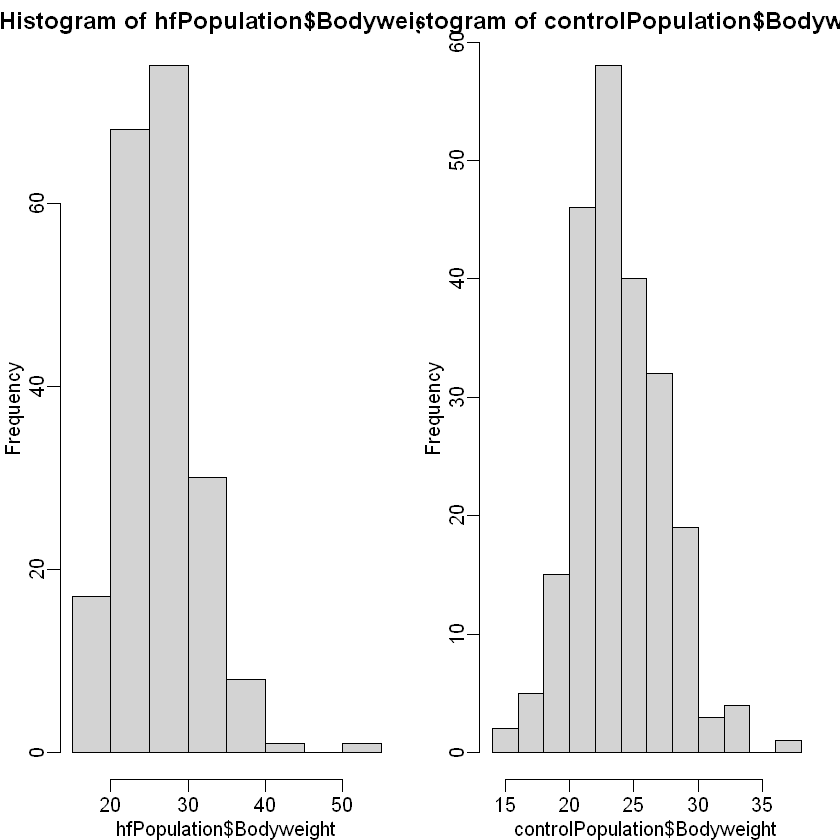

In [9]:
library(rafalib)
mypar(1,2)
hist(hfPopulation$Bodyweight)
hist(controlPopulation$Bodyweight)

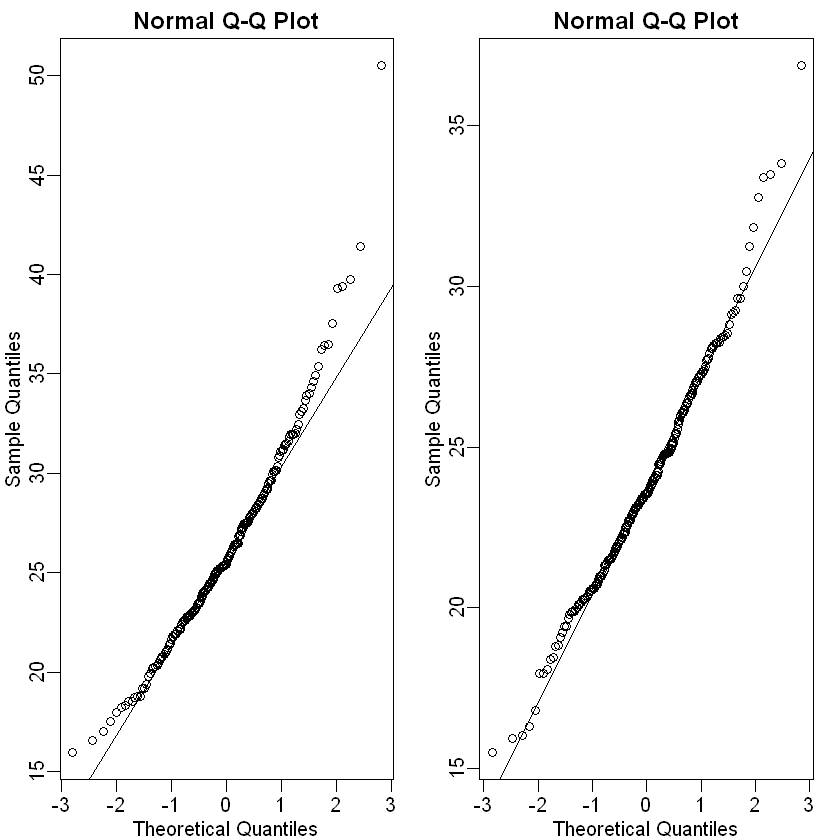

In [10]:
mypar(1,2)
qqnorm(hfPopulation$Bodyweight)
qqline(hfPopulation$Bodyweight)
qqnorm(controlPopulation$Bodyweight)
qqline(controlPopulation$Bodyweight)

In [13]:
d1=hfPopulation$Bodyweight
d2=controlPopulation$Bodyweight

Q1:If a list of numbers has a distribution that is well approximated by the normal distribution, what proportion of these numbers are within one standard deviation away from the list’s average?

In [22]:
length(which(d1<=mean(d1)-sd(d1))+length(d1>=mean(d1)+sd(d1)))/length(d1)

[1] 0.145

In [25]:
length(which(d2<=mean(d2)-sd(d2))+length(d2>=mean(d2)+sd(d2)))/length(d2)

[1] 0.1422222

Q2:What proportion of these numbers are within two standard deviations away from the list’s average?

In [23]:
length(which(d1<=mean(d1)-2*sd(d1))+length(d1>=mean(d1)+2*sd(d1)))/length(d1)

[1] 0.005

In [26]:
length(which(d2<=mean(d2)-2*sd(d2))+length(d2>=mean(d2)+2*sd(d2)))/length(d2)

[1] 0.02222222

Q3:What proportion of these numbers are within three standard deviations away from the list’s average?

In [24]:
length(which(d1<=mean(d1)-3*sd(d1))+length(d1>=mean(d1)+3*sd(d1)))/length(d1)

[1] 0

In [27]:
length(which(d2<=mean(d2)-3*sd(d2))+length(d2>=mean(d2)+3*sd(d2)))/length(d2)

[1] 0

Q4: Define y to be the weights of males on the control diet. What proportion of the mice are
within one standard deviation away from the average weight (remember to use popsd for the
population sd)?

In [4]:
head(controlPopulation)

,Sex,Diet,Bodyweight
,<chr>,<chr>,<dbl>
1,F,chow,27.03
2,F,chow,24.80
3,F,chow,27.02
4,F,chow,28.07
5,F,chow,23.55
6,F,chow,22.72


In [5]:
mean(controlPopulation$Bodyweight)
sd(controlPopulation$Bodyweight)

[1] 23.89338

[1] 3.424056

In [7]:
quant<-length(which(controlPopulation$Bodyweight<mean(controlPopulation$Bodyweight)-sd(controlPopulation$Bodyweight)))/length(controlPopulation$Bodyweight)
quant

[1] 0.1422222

Q5:What proportion of these numbers are within two standard deviations away from the list’s average?

In [8]:
quant1<-length(which(controlPopulation$Bodyweight<mean(controlPopulation$Bodyweight)-2*sd(controlPopulation$Bodyweight)))/length(controlPopulation$Bodyweight)
quant1

[1] 0.02222222

Q6: What proportion of these numbers are within three standard deviations away from the list’s
average?

In [9]:
quant2<-length(which(controlPopulation$Bodyweight<mean(controlPopulation$Bodyweight)-3*sd(controlPopulation$Bodyweight)))/length(controlPopulation$Bodyweight)
quant2

[1] 0

Q7: Note that the numbers for the normal distribution and our weights are relatively close. Also,
notice that we are indirectly comparing quantiles of the normal distribution to quantiles of the
mouse weight distribution. We can actually compare all quantiles using a qqplot. Which of the
following best describes the qq-plot comparing mouse weights to the normal distribution?
• A) The points on the qq-plot fall exactly on the identity line.
• B) The average of the mouse weights is not 0 and thus it can’t follow a normal distribution.
• C) The mouse weights are well approximated by the normal distribution, although the
larger values (right tail) are larger than predicted by the normal. This is consistent with
the differences seen between question 3 and 6.
• D) These are not random variables and thus they can’t follow a normal distribution

A

Q8: Create the above qq-plot for the four populations: male/females on each of the two diets. What
is the most likely explanation for the mouse weights being well approximated? What is the
best explanation for all these being well approximated by the normal distribution?
• A) The CLT tells us that sample averages are approximately normal.
• B) This just happens to be how nature behaves. Perhaps the result of many biological
factors averaging out.
• C) Everything measured in nature follows a normal distribution.
• D) Measurement error is normally distributed.

A

In [10]:
controlPopulation2=filter(dat,Sex == "M" & Diet == "chow")
hfPopulation2=filter(dat,Sex == "M" & Diet == "hf")

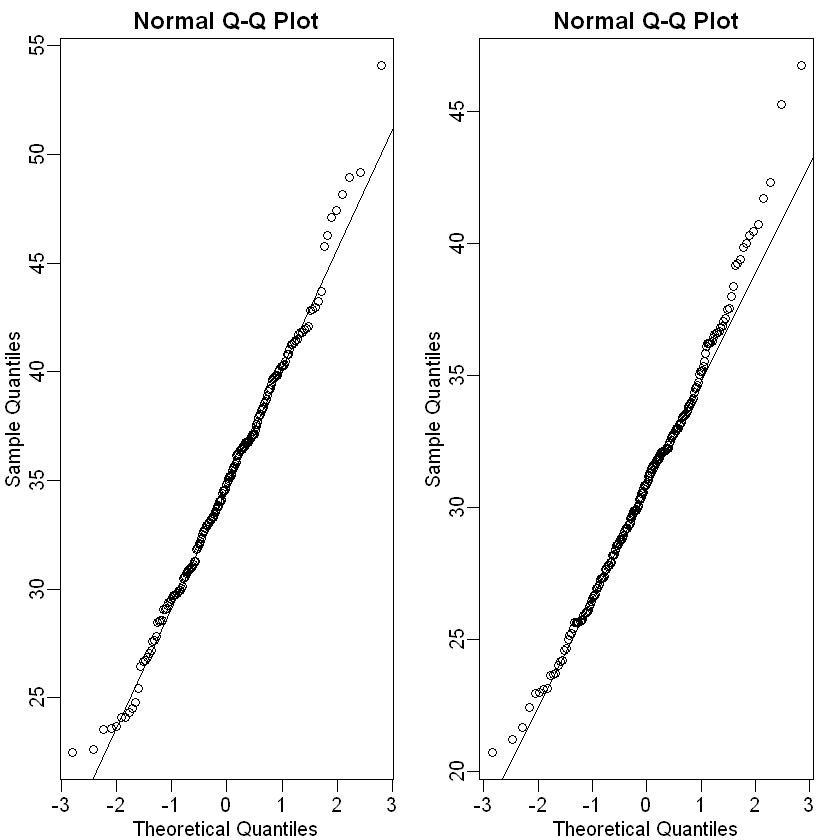

In [12]:
library(rafalib)
mypar(1,2)
qqnorm(hfPopulation2$Bodyweight)
qqline(hfPopulation2$Bodyweight)
qqnorm(controlPopulation2$Bodyweight)
qqline(controlPopulation2$Bodyweight)

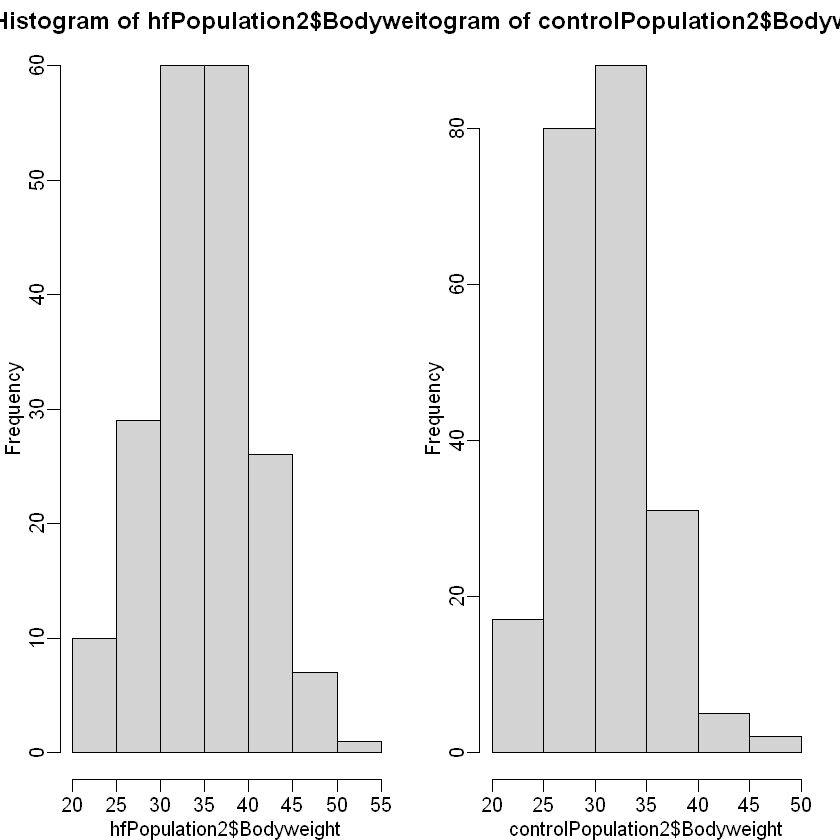

In [13]:
library(rafalib)
mypar(1,2)
hist(hfPopulation2$Bodyweight)
hist(controlPopulation2$Bodyweight)

Q9: Here we are going to use the function replicate to learn about the distribution of random
variables. All the above exercises relate to the normal distribution as an approximation of the
distribution of a fixed list of numbers or a population. We have not yet discussed probability in
these exercises. If the distribution of a list of numbers is approximately normal, then if we pick
a number at random from this distribution, it will follow a normal distribution. However, it is
important to remember that stating that some quantity has a distribution does not necessarily
imply this quantity is random. Also, keep in mind that this is not related to the central limit
theorem. The central limit applies to averages of random variables. Let’s explore this concept.
We will now take a sample of size 25 from the population of males on the chow diet. The
average of this sample is our random variable. We will use the replicate to observe 10,000
realizations of this random variable. Set the seed at 1, generate these 10,000 averages. Make a
histogram and qq-plot of these 10,000 numbers against the normal distribution.
We can see that, as predicted by the CLT, the distribution of the random variable is very well
approximated by the normal distribution.

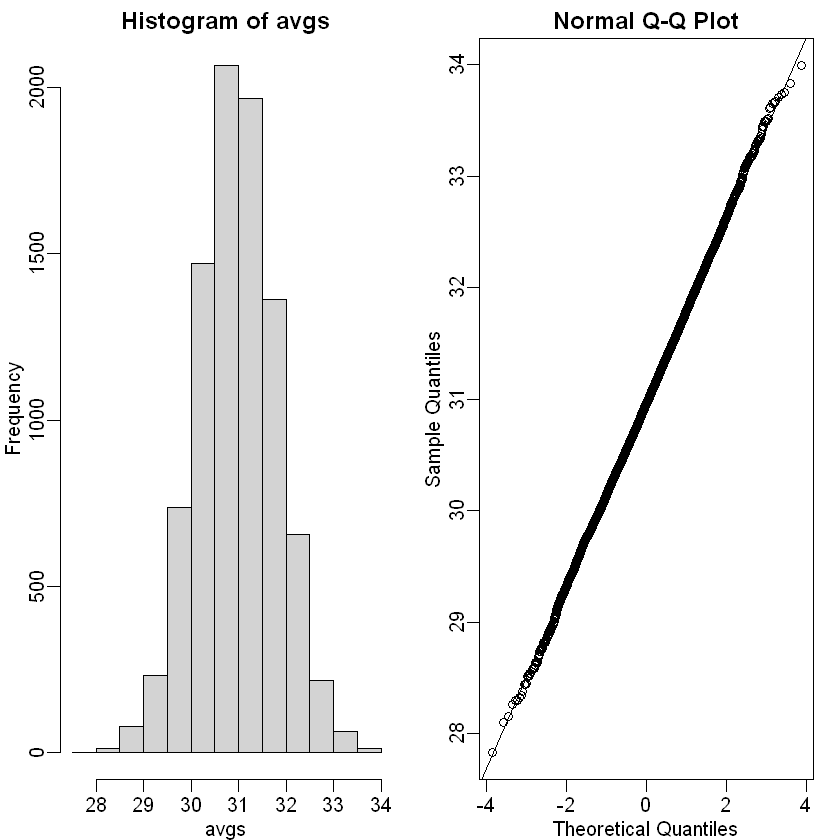

In [19]:
y <- filter(dat, Sex=="M" & Diet=="chow") %>% select(Bodyweight) %>% unlist
avgs <- replicate(10000, mean( sample(y, 25)))
mypar(1,2)
hist(avgs)
qqnorm(avgs)
qqline(avgs)

What is the average of the distribution of the sample average?

In [23]:
mean(avgs,na.rm=TRUE)

[1] 30.97156

Q10: What is the standard deviation of the distribution of sample averages?

In [24]:
sd(avgs,na.rm=TRUE)

[1] 0.8275174

Q11:According to the CLT, the answer to exercise 9 should be the same as mean(y). You should be
able to confirm that these two numbers are very close. Which of the following does the CLT
tell us should be close to your answer to exercise 10?
• A) popsd(y)
• B) popsd(avgs)/sqrt(25)
• C) sqrt(25) / popsd(y)
• D) popsd(y)/sqrt(25)

D

In [27]:
popsd(y,na.rm=TRUE)
popsd(avgs,na.rm=TRUE)/sqrt(25)
sqrt(25) / popsd(y,na.rm=TRUE)
popsd(y,na.rm=TRUE)/sqrt(25)

[1] 4.420545

[1] 0.1654952

[1] 1.131082

[1] 0.884109

Q12: In practice we do not know σ (popsd(y)) which is why we can’t use the CLT directly. This
is because we see a sample and not the entire distribution. We also can’t use popsd(avgs)
because to construct averages, we have to take 10,000 samples and this is never practical. We
usually just get one sample. Instead we have to estimate popsd(y). As described, what we use
is the sample standard deviation. Set the seed at 1, using the replicate function, create 10,000
samples of 25 and now, instead of the sample average, keep the standard deviation. Look at
the distribution of the sample standard deviations. It is a random variable. The real population
SD is about 4.5. What proportion of the sample SDs are below 3.5?

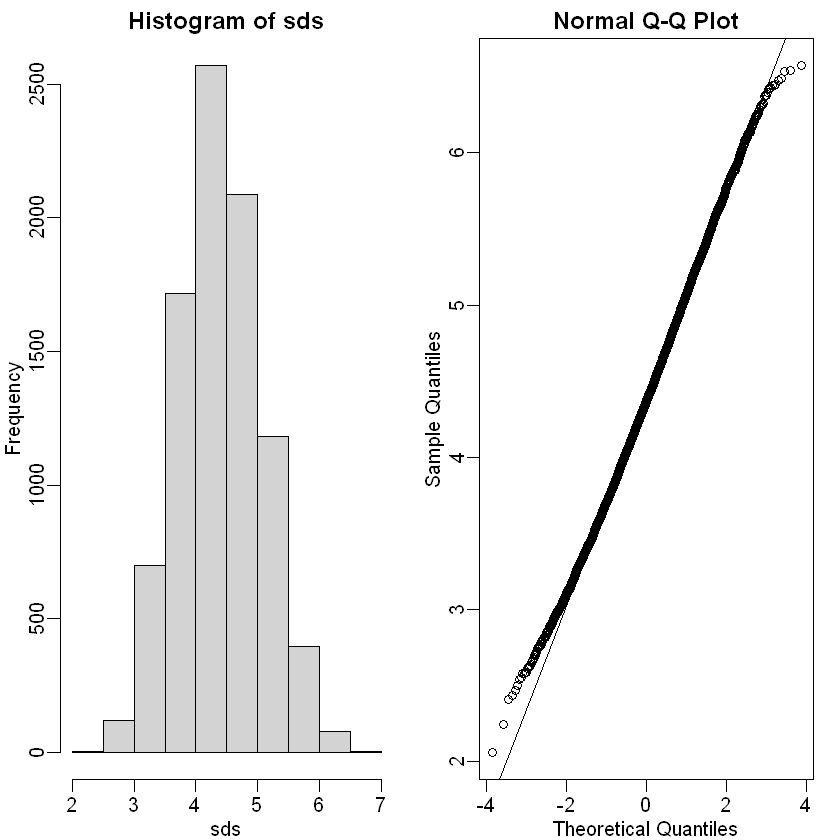

In [29]:
y <- filter(dat, Sex=="M" & Diet=="chow") %>% select(Bodyweight) %>% unlist
sds <- replicate(10000,sd(sample(y, 25)))
mypar(1,2)
hist(sds)
qqnorm(sds)
qqline(sds)

In [30]:
quant3<-length(which(sds<3.5))/length(sds)
quant3

[1] 0.0823

Q13: What the answer to question 12 reveals is that the denominator of the t-test is a random
variable. By decreasing the sample size, you can see how this variability can increase. It
therefore adds variability. The smaller the sample size, the more variability is added. The
normal distribution stops providing a useful approximation. When the distribution of the
population values is approximately normal, as it is for the weights, the t-distribution provides
a better approximation. We will see this later on. Here we will look at the difference
between the t-distribution and normal. Use the function qt and qnorm to get the quantiles
of x=seq(0.0001,0.9999,len=300). Do this for degrees of freedom 3, 10, 30, and 100. Which
of the following is true?
• A) The t-distribution and normal distribution are always the same.
• B) The t-distribution has a higher average than the normal distribution.
• C) The t-distribution has larger tails up until 30 degrees of freedom, at which point it is
practically the same as the normal distribution.
• D) The variance of the t-distribution grows as the degrees of freedom grow.

C

In [34]:
x=seq(0.0001,0.9999,len=300)

In [37]:
a=qnorm(x)
b1=qt(x,df=3)
b2=qt(x,df=10)
b3=qt(x,df=30)
b4=qt(x,df=100)

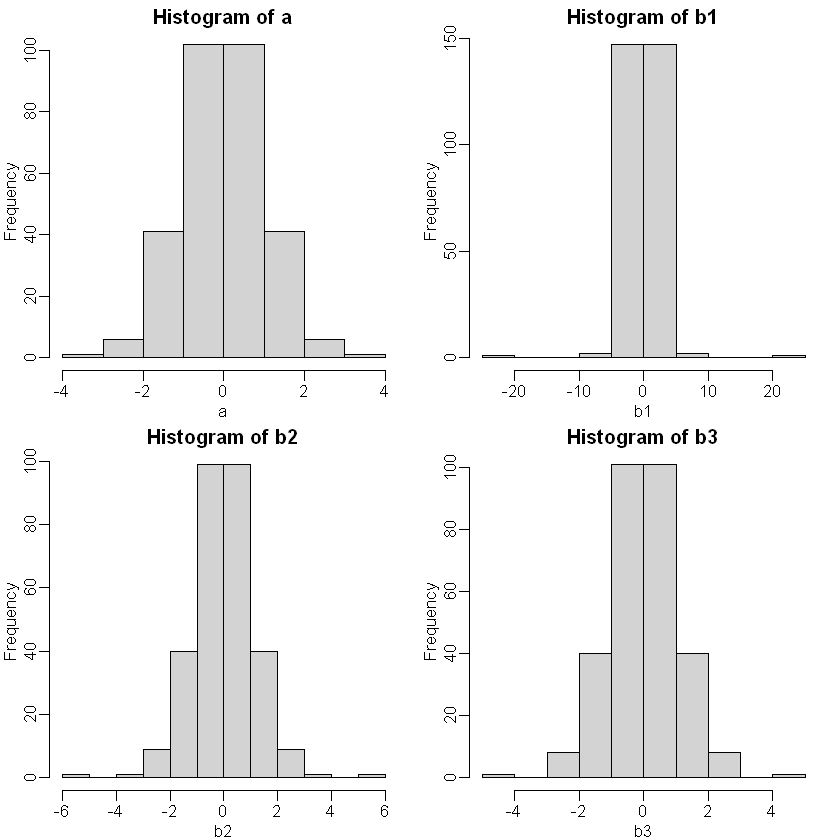

In [39]:
mypar(2,2)
hist(a)
hist(b1)
hist(b2)
hist(b3)

# Central Limit Theorem in Practice

In [40]:
library(dplyr)
controlPopulation <- filter(dat,Sex == "F" & Diet == "chow") %>%
select(Bodyweight) %>% unlist
hfPopulation <- filter(dat,Sex == "F" & Diet == "hf") %>%
select(Bodyweight) %>% unlist

In [41]:
mu_hf <- mean(hfPopulation)
mu_control <- mean(controlPopulation)
print(mu_hf - mu_control)

[1] 2.375517


In [42]:
x <- controlPopulation
N <- length(x)
populationvar <- mean((x-mean(x))^2)
identical(var(x), populationvar)

[1] FALSE

In [43]:
identical(var(x)*(N-1)/N, populationvar)

[1] TRUE

In [44]:
library(rafalib)
sd_hf <- popsd(hfPopulation)
sd_control <- popsd(controlPopulation)

In [45]:
N <- 12
hf <- sample(hfPopulation, 12)
control <- sample(controlPopulation, 12)

In [47]:
Ns <- c(3,12,25,50) 
B <- 10000 #number of simulations
res <- sapply(Ns,function(n) {
replicate(B,mean(sample(hfPopulation,n))-mean(sample(controlPopulation,n)))
})

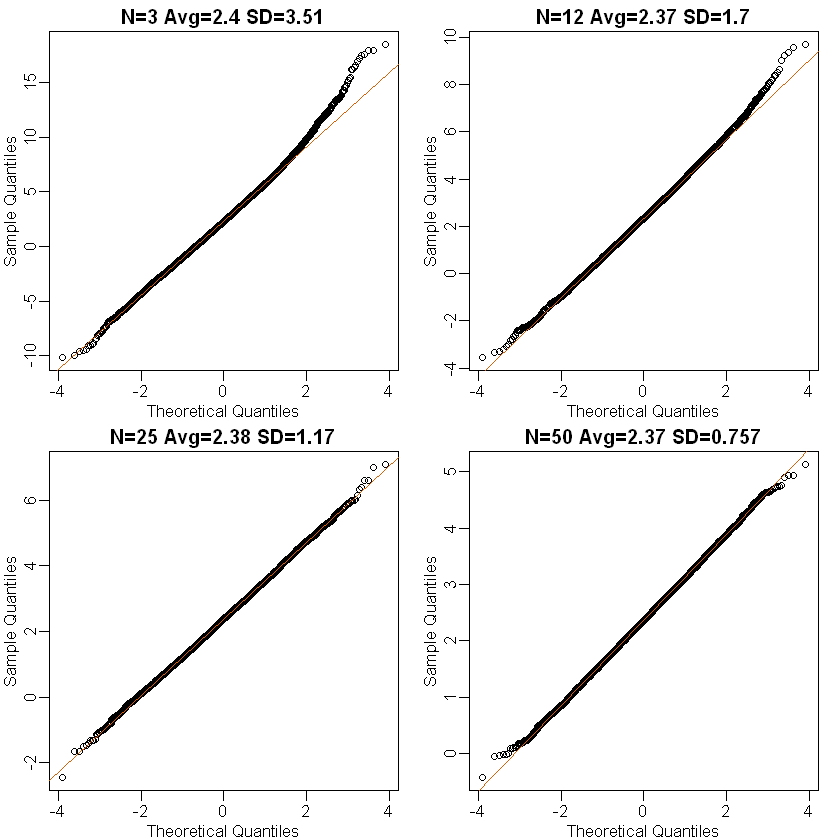

In [48]:
mypar(2,2)
for (i in seq(along=Ns)) {
titleavg <- signif(mean(res[,i]),3)
titlesd <- signif(popsd(res[,i]),3)
title <- paste0("N=",Ns[i]," Avg=",titleavg," SD=",titlesd)
qqnorm(res[,i],main=title)
qqline(res[,i],col=2) }

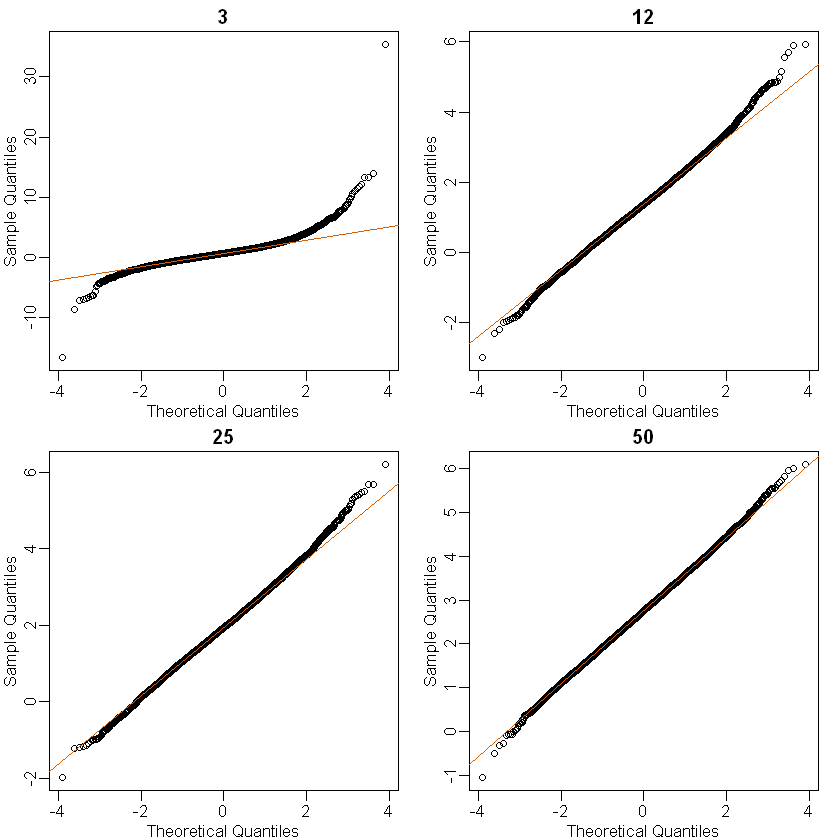

In [50]:
Ns <- c(3,12,25,50) 
B <- 10000 #number of simulations
##function to compute a t-stat
computetstat <- function(n) {
y <- sample(hfPopulation,n)
x <- sample(controlPopulation,n)
(mean(y)-mean(x))/sqrt(var(y)/n+var(x)/n)
}
res <- sapply(Ns,function(n) {
replicate(B,computetstat(n))
})
mypar(2,2)
for (i in seq(along=Ns)) {
qqnorm(res[,i],main=Ns[i])
qqline(res[,i],col=2) }

In [52]:
dat <- read.csv("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\femaleMiceWeights.csv")

Q1: The CLT is a result from probability theory. Much of probability theory was originally inspired
by gambling. This theory is still used in practice by casinos. For example, they can estimate
how many people need to play slots for there to be a 99.9999% probability of earning enough
money to cover expenses. Let’s try a simple example related to gambling.
Suppose we are interested in the proportion of times we see a 6 when rolling n=100 die. This
is a random variable which we can simulate with x=sample(1:6, n, replace=TRUE) and the
proportion we are interested in can be expressed as an average: mean(x==6). Because the die
rolls are independent, the CLT applies.
We want to roll n dice 10,000 times and keep these proportions. This random variable
(proportion of 6s) has mean p=1/6 and variance p*(1-p)/n. So according to CLT z =
(mean(x==6) - p) / sqrt(p*(1-p)/n) should be normal with mean 0 and SD 1. Set the
seed to 1, then use replicate to perform the simulation, and report what proportion of times
z was larger than 2 in absolute value (CLT says it should be about 0.05).

In [11]:
n <- 100
B <- 10000
p <- 1/6

set.seed(1)
res_list <- replicate(B, {
  x = sample(1:6,n, replace = T)
  z <- (mean(x==6)-p) / sqrt(p*(1-p)/n)
  return(z)
})
mean(abs(res_list) > 2)

[1] 0.0431

Q2: For the last simulation you can make a qqplot to confirm the normal approximation. Now, the
CLT is an asympototic result, meaning it is closer and closer to being a perfect approximation
as the sample size increases. In practice, however, we need to decide if it is appropriate for
actual sample sizes. Is 10 enough? 15? 30?
In the example used in exercise 1, the original data is binary (either 6 or not). In this case, the
success probability also affects the appropriateness of the CLT. With very low probabilities,
we need larger sample sizes for the CLT to “kick in”.
Run the simulation from exercise 1, but for different values of p and n. For which of the
following is the normal approximation best?
• A) p=0.5 and n=5
• B) p=0.5 and n=30
• C) p=0.01 and n=30
• D) p=0.01 and n=100

D

In [12]:
set.seed(1)
P <- c(0.01,0.5)
N <- c(5,30,100)
f1 <- function(n,p, B) {
  res_list <- replicate(B, {
    sides <- 1/p
    x = sample(1:sides, n, replace = T)
    y <- (mean(x==1)-p) / sqrt(p*(1-p)/n)
    return(y)
  })
}

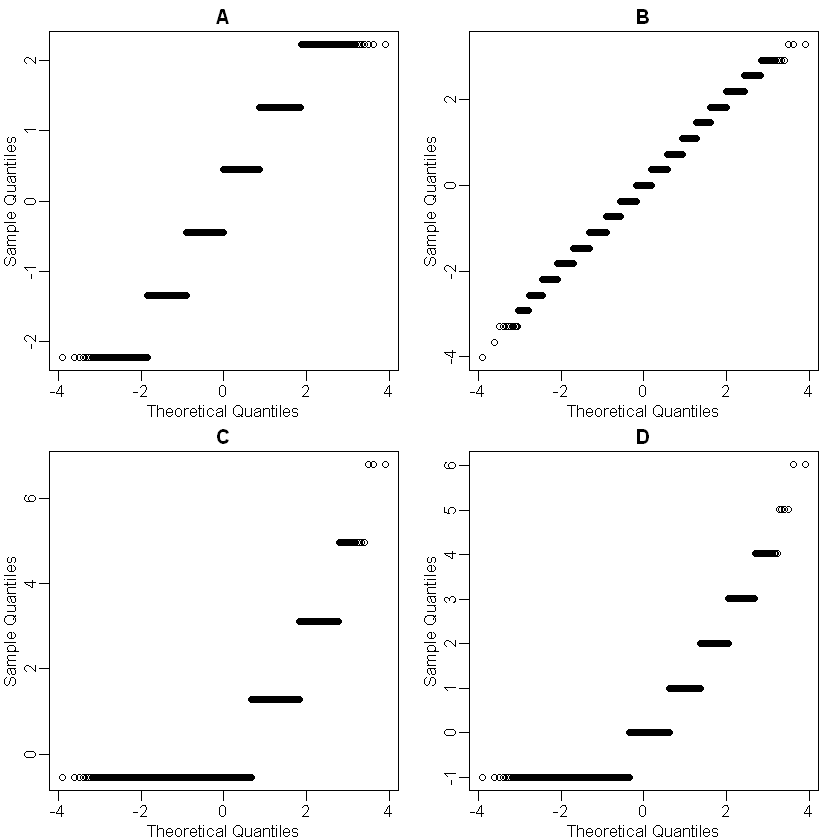

In [13]:
mypar(2,2)
qqnorm(f1(5,0.5,10000), main = 'A')
qqnorm(f1(30,0.5,10000), main = 'B') # the answer is B
qqnorm(f1(30,0.01,10000), main = 'C')
qqnorm(f1(100,0.01,10000), main = 'D')

Q3: As we have already seen, the CLT also applies to averages of quantitative data. A major
difference with binary data, for which we know the variance is p(1−p), is that with quantitative
data we need to estimate the population standard deviation.
In several previous exercises we have illustrated statistical concepts with the unrealistic
situation of having access to the entire population. In practice, we do not have access to entire
populations. Instead, we obtain one random sample and need to reach conclusions analyzing
that data. dat is an example of a typical simple dataset representing just one sample. We have
12 measurements for each of two populations:

In [1]:
library(rafalib)
library(dplyr)
dat <- read.csv("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\mice_pheno.csv")
X <- filter(dat, Diet=="chow") %>% select(Bodyweight) %>% unlist
Y <- filter(dat, Diet=="hf") %>% select(Bodyweight) %>% unlist


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




We think of X as a random sample from the population of all mice in the control diet and Y
as a random sample from the population of all mice in the high fat diet.
Define the parameter $\mu_x$ as the average of the control population. We estimate this parameter
with the sample average $\hat{X}$. What is the sample average?

In [6]:
mean(X,na.rm=TRUE)

[1] 27.41281

Q4: We don’t know $\mu_x$ , but want to use $\bar{X}$ to understand $\mu_x$. Which of the following uses CLT to
understand how well $\bar{X}$ approximates $\mu_x$ ? 

• A) $\bar{X}$ follows a normal distribution with mean 0 and standard deviation 1.

• B) $\mu_x$ follows a normal distribution with mean $\bar{X}$ and standard deviation $\frac{\mu_x}{\sqrt{12}}$ where $\mu_x$ is the population standard deviation.

• C) $\bar{X}$ follows a normal distribution with mean $\mu_x$ and standard deviation $\mu_x$ where $\mu_x$ is
the population standard deviation.

• D) $\bar{X}$ follows a normal distribution with mean µX and standard deviation $\frac{\mu_x}{\sqrt{12}}$  where $\mu_x$ is the population standard deviation

A

Q5:What does the CLT tell us is the mean of Z (you don’t need code)?

0

Q6: The result of 4 and 5 tell us that we know the distribution of the difference between our
estimate and what we want to estimate, but don’t know. However, the equation involves the
population standard deviation $\mu_x$, which we don’t know. Given what we discussed, what is
your estimate of $\mu_x$?

In [15]:
sd(X,na.rm=TRUE)

[1] 5.305584

Q7: Use the CLT to approximate the probability that our estimate $\hat{X}$ is off by more than 5.21 ounces
from $\mu_x$.

$$Z=\frac{\bar{X_1}-\bar{X_2}}{\frac{S_1}{n_1}+\frac{S_2}{n_2}}$$

In [17]:
z <- 2/(sqrt(sd(X,na.rm=TRUE)^2/12))
pnorm(-z) + 1- pnorm(z)

[1] 0.1916095

Q8:$SE(\bar{X}-\bar{Y})$

In [18]:
sqrt((sd(X,na.rm=TRUE)^2 + sd(Y,na.rm=TRUE)^2)/12)

[1] 2.500077

Q9: So now we can compute $\bar{Y}-\bar{X}$as well as an estimate of this standard error and construct a
t-statistic. What is this t-statistic?

In [20]:
mean(Y,na.rm=TRUE)-mean(X,na.rm=TRUE)

[1] 3.069195

Q10: If we apply the CLT, what is the distribution of this t-statistic?

• A) Normal with mean 0 and standard deviation 1.

• B) t-distributed with 22 degrees of freedom.

• C) Normal with mean 0 and standard deviation$\sqrt{\sigma^2_y+\sigma^2_x}$

• D) t-distributed with 12 degrees of freedom

A

Q11: Now we are ready to compute a p-value using the CLT. What is the probability of observing
a quantity as large as what we computed in 10, when the null distribution is true?

In [21]:
t <- (mean(Y,na.rm=TRUE) - mean(X,na.rm=TRUE))/ sqrt((sd(X,na.rm=TRUE)^2 + sd(Y,na.rm=TRUE)^2)/12) 
(1-pnorm(t))*2

[1] 0.2195821

Q12:CLT provides an approximation for cases in which the sample size is large. In practice, we
can’t check the assumption because we only get to see 1 outcome (which you computed
above). As a result, if this approximation is off, so is our p-value. As described earlier, there
is another approach that does not require a large sample size, but rather that the distribution
of the population is approximately normal. We don’t get to see this distribution so it is again
an assumption, although we can look at the distribution of the sample with qqnorm(X) and
qqnorm(Y). If we are willing to assume this, then it follows that the t-statistic follows tdistribution. What is the p-value under the t-distribution approximation? Hint: use the t.test
function.

In [24]:
t.test(X,Y)


	Welch Two Sample t-test

data:  X and Y
t = -7.1932, df = 735.02, p-value = 1.563e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.906857 -2.231533
sample estimates:
mean of x mean of y 
 27.41281  30.48201 


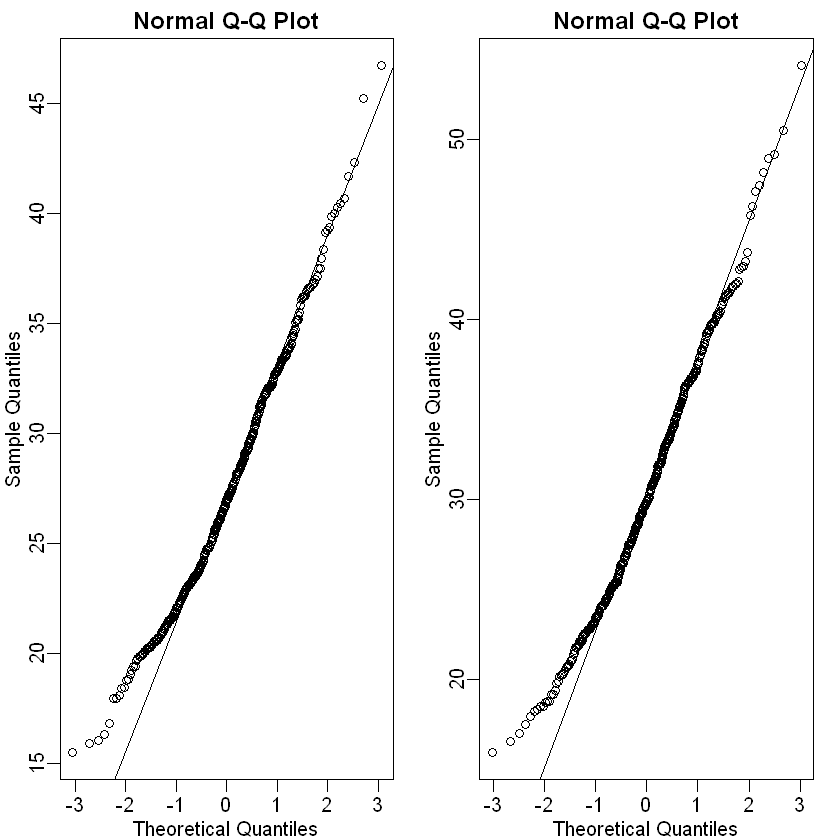

In [25]:
mypar(1,2)
qqnorm(X)
qqline(X)
qqnorm(Y)
qqline(Y)

Q13:

With the CLT distribution, we obtained a p-value smaller than 0.05 and with the t-distribution,
one that is larger. They can’t both be right. What best describes the difference?

• A) A sample size of 12 is not large enough, so we have to use the t-distribution
approximation.

• B) These are two different assumptions. The t-distribution accounts for the variability
introduced by the estimation of the standard error and thus, under the null, large values
are more probable under the null distribution.

• C) The population data is probably not normally distributed so the t-distribution
approximation is wrong.

• D) Neither assumption is useful. Both are wrong

B

t-tests in Practice

In [26]:
library(dplyr)
dat <- read.csv("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\femaleMiceWeights.csv")
control <- filter(dat,Diet=="chow") %>% select(Bodyweight) %>% unlist
treatment <- filter(dat,Diet=="hf") %>% select(Bodyweight) %>% unlist
diff <- mean(treatment) - mean(control)
print(diff)

[1] 3.020833


$$SE(\hat{X})=\frac{\sigma} {\sqrt{N}}$$

In [27]:
sd(control)/sqrt(length(control))

[1] 0.8725323

In [28]:
se <- sqrt(
var(treatment)/length(treatment) +
var(control)/length(control)
)

In [29]:
tstat <- diff/se

In [30]:
righttail <- 1 - pnorm(abs(tstat))
lefttail <- pnorm(-abs(tstat))
pval <- lefttail + righttail
print(pval)

[1] 0.0398622


The t-distribution in Practice

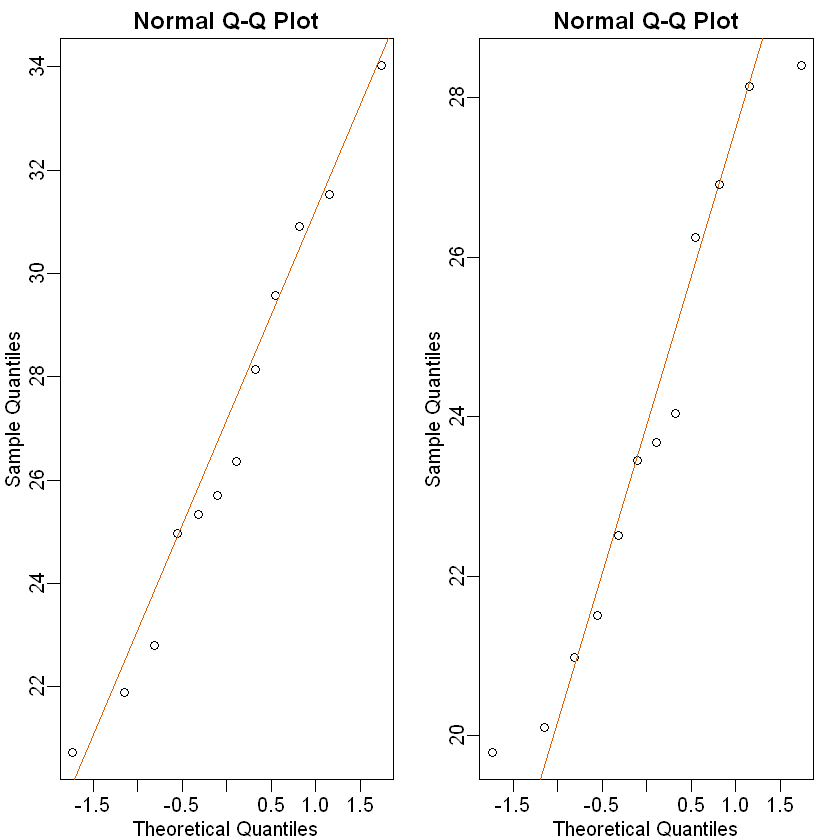

In [31]:
library(rafalib)
mypar(1,2)
qqnorm(treatment)
qqline(treatment,col=2)
qqnorm(control)
qqline(control,col=2)

In [32]:
t.test(treatment, control)


	Welch Two Sample t-test

data:  treatment and control
t = 2.0552, df = 20.236, p-value = 0.053
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04296563  6.08463229
sample estimates:
mean of x mean of y 
 26.83417  23.81333 


In [33]:
result <- t.test(treatment,control)
result$p.value

[1] 0.05299888

In [34]:
dat <- read.csv("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\mice_pheno.csv")
control <- filter(dat,Diet=="chow") %>% select(Bodyweight)
treatment <- filter(dat,Diet=="hf") %>% select(Bodyweight)
t.test(treatment,control)


	Welch Two Sample t-test

data:  treatment and control
t = 7.1932, df = 735.02, p-value = 1.563e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.231533 3.906857
sample estimates:
mean of x mean of y 
 30.48201  27.41281 


Confidence Intervals

In [35]:
chowPopulation <- dat[dat$Sex=="F" & dat$Diet=="chow",3]
mu_chow <- mean(chowPopulation)
print(mu_chow)

[1] 23.89338


In [36]:
N <- 30
chow <- sample(chowPopulation,N)
print(mean(chow))

[1] 23.96833


In [37]:
se <- sd(chow)/sqrt(N)
print(se)

[1] 0.7000092


confidence interval: $-2\le \sqrt{N}(\bar{X}-\mu_X)/s_X\le 2$

In [38]:
pnorm(2) - pnorm(-2)

[1] 0.9544997

confidence interval: $\bar{X}-2s_X/\sqrt{N}\le \mu_X \le \bar{X}+2s_X/\sqrt{N}$

In [39]:
Q <- qnorm(1- 0.05/2)
interval <- c(mean(chow)-Q*se, mean(chow)+Q*se )
interval

[1] 22.59634 25.34033

In [40]:
interval[1] < mu_chow & interval[2] > mu_chow

[1] TRUE

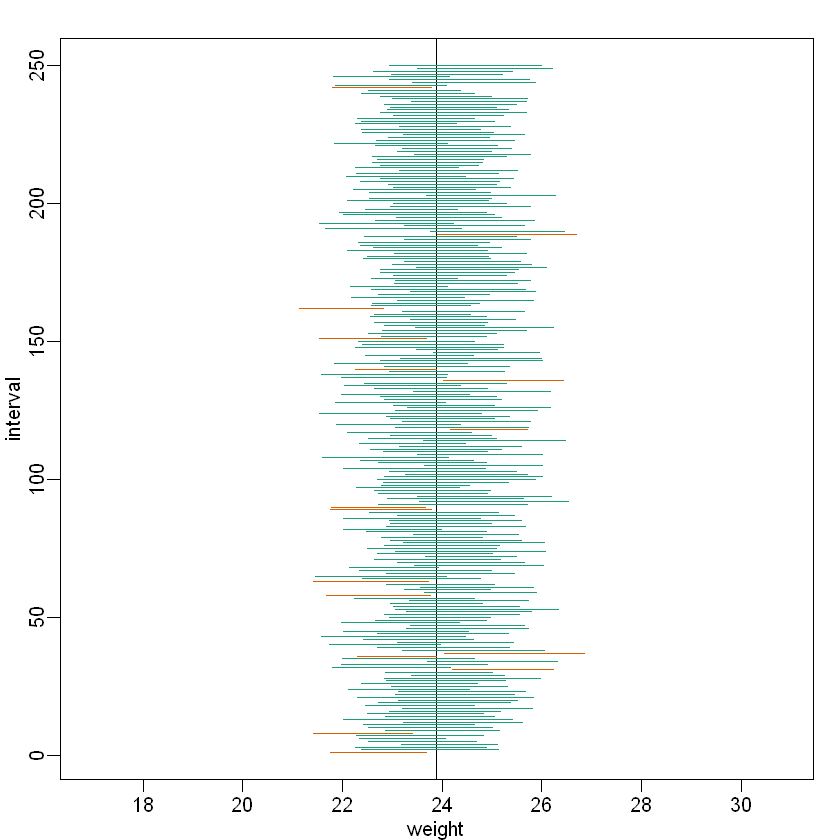

In [41]:
library(rafalib)
B <- 250
mypar()
plot(mean(chowPopulation)+c(-7,7),c(1,1),type="n",
xlab="weight",ylab="interval",ylim=c(1,B))
abline(v=mean(chowPopulation))
for (i in 1:B) {
chow <- sample(chowPopulation,N)
se <- sd(chow)/sqrt(N)
interval <- c(mean(chow)-Q*se, mean(chow)+Q*se)
covered <-
mean(chowPopulation) <= interval[2] & mean(chowPopulation) >= interval[1]
color <- ifelse(covered,1,2)
lines(interval, c(i,i),col=color)
}

Small Sample Size And The CLT

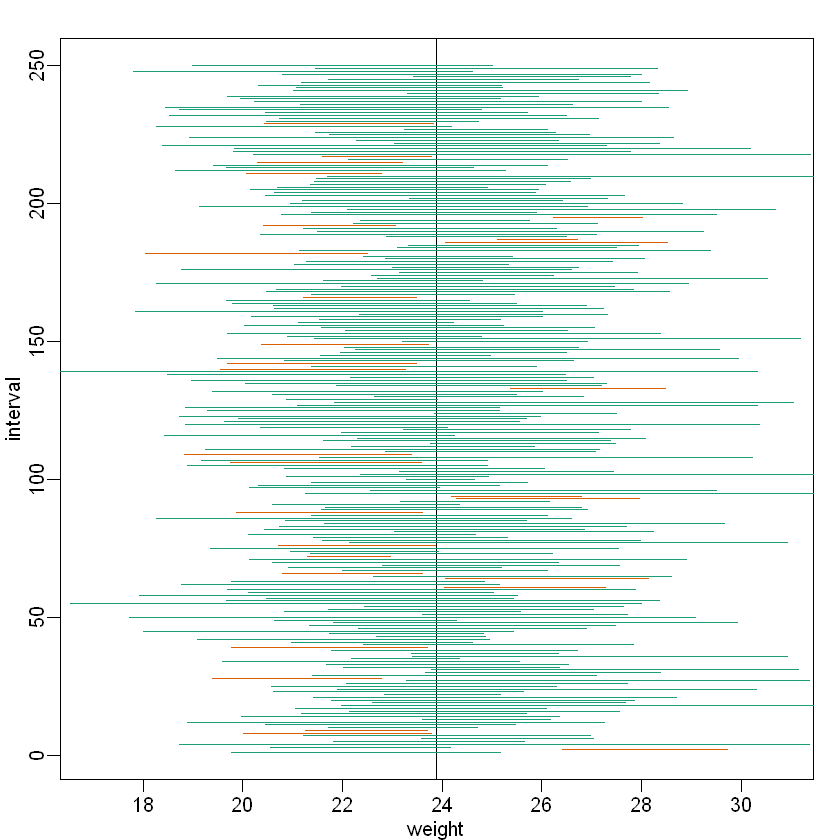

In [45]:
mypar()
plot(mean(chowPopulation)+c(-7,7),c(1,1),type="n",
xlab="weight",ylab="interval",ylim=c(1,B))
abline(v=mean(chowPopulation))
Q <- qnorm(1- 0.05/2) 
N <- 5
for (i in 1:B) {
chow <- sample(chowPopulation,N)
se <- sd(chow)/sqrt(N)
interval <- c(mean(chow)-Q*se, mean(chow)+Q*se)
covered <- mean(chowPopulation) <= interval[2] & mean(chowPopulation) >= interval[
    1]
    color <- ifelse(covered,1,2)
    lines(interval, c(i,i),col=color)
}

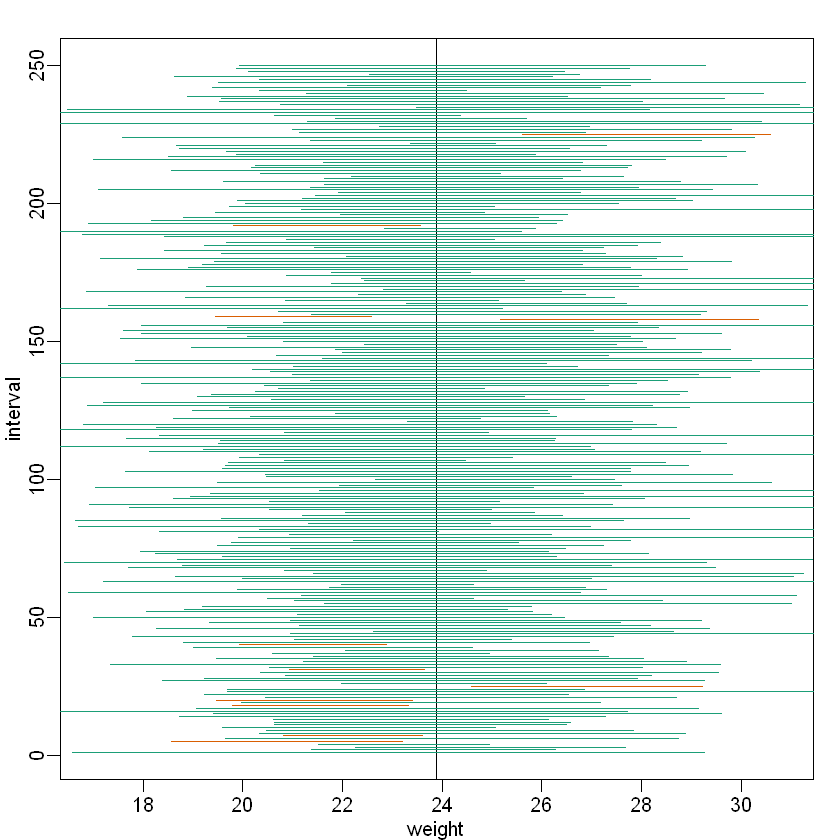

In [52]:
mypar()
plot(mean(chowPopulation)+c(-7,7),c(1,1),type="n",
xlab="weight",ylab="interval",ylim=c(1,B))
abline(v=mean(chowPopulation))
Q <- qt(1- 0.05/2, df=4)
N <- 5
for (i in 1:B) {
chow <- sample(chowPopulation,N)
se <- sd(chow)/sqrt(N)
interval <- c(mean(chow)-Q*se, mean(chow)+Q*se)
covered <- mean(chowPopulation) <= interval[2] & mean(chowPopulation) >= interval[
    1]
    color <- ifelse(covered,1,2)
    lines(interval, c(i,i),col=color)
}

In [53]:
qt(1- 0.05/2, df=4)

[1] 2.776445

In [54]:
qnorm(1- 0.05/2)

[1] 1.959964

Connection Between Confidence Intervals and p-values

In [57]:
t.test(treatment,control,conf.level=0.9)$conf.int

[1] 2.366479 3.771911
attr(,"conf.level")
[1] 0.9

Power Calculations

In [58]:
controlPopulation <- filter(dat,Sex == "F" & Diet == "chow") %>%
select(Bodyweight) %>% unlist
hfPopulation <- filter(dat,Sex == "F" & Diet == "hf") %>%
select(Bodyweight) %>% unlist
mu_hf <- mean(hfPopulation)
mu_control <- mean(controlPopulation)
print(mu_hf - mu_control)

[1] 2.375517


In [59]:
print((mu_hf - mu_control)/mu_control * 100)

[1] 9.942157


In [1]:
library(dplyr)
dat <- read.csv("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\mice_pheno.csv")
controlPopulation <- filter(dat,Sex == "F" & Diet == "chow") %>%
select(Bodyweight) %>% unlist
hfPopulation <- filter(dat,Sex == "F" & Diet == "hf") %>%
select(Bodyweight) %>% unlist
mu_hf <- mean(hfPopulation)
mu_control <- mean(controlPopulation)
print(mu_hf - mu_control)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] 2.375517


In [3]:
set.seed(1) 
N <- 5
hf <- sample(hfPopulation,N)
control <- sample(controlPopulation,N)
t.test(hf,control)$p.value

[1] 0.5806661

In [4]:
N <- 12
alpha <- 0.05
B <- 2000
reject <- function(N, alpha=0.05){
hf <- sample(hfPopulation,N)
control <- sample(controlPopulation,N)
pval <- t.test(hf,control)$p.value
pval < alpha
}

In [5]:
reject(12)

[1] TRUE

In [6]:
rejections <- replicate(B,reject(N))
mean(rejections)

[1] 0.2155

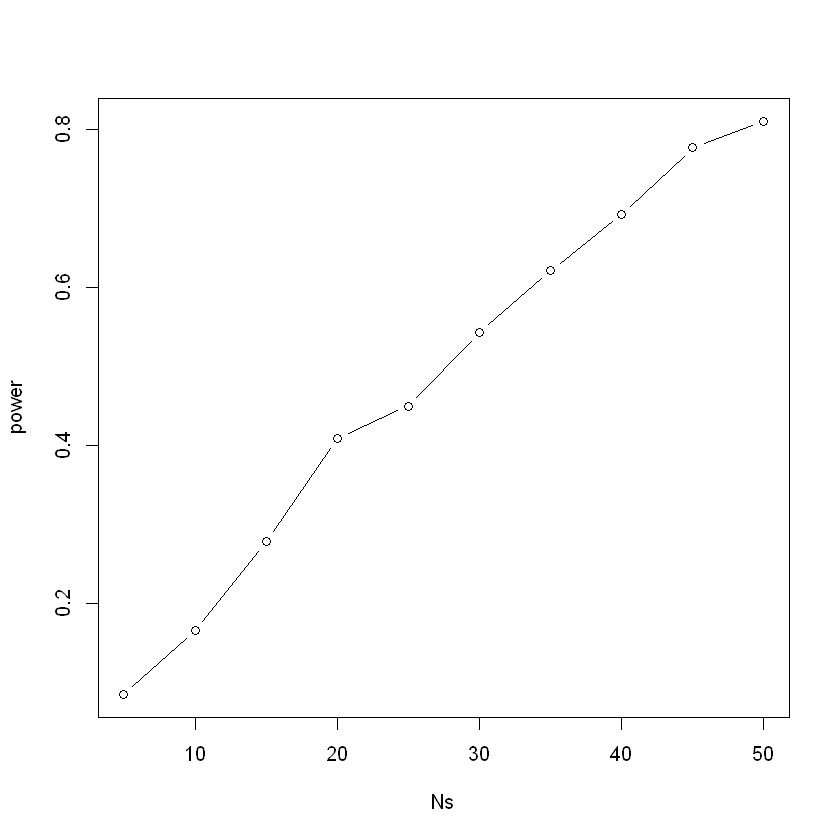

In [7]:
Ns <- seq(5, 50, 5)
power <- sapply(Ns,function(N){
rejections <- replicate(B, reject(N))
mean(rejections)
})
plot(Ns, power, type="b")

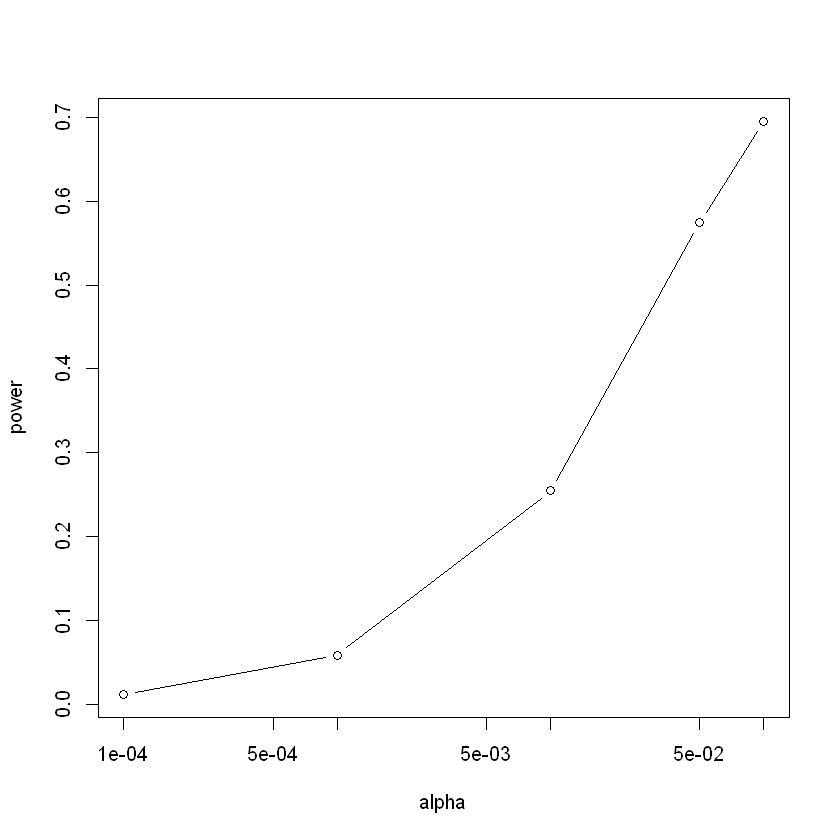

In [8]:
N <- 30
alphas <- c(0.1,0.05,0.01,0.001,0.0001)
power <- sapply(alphas,function(alpha){
rejections <- replicate(B,reject(N,alpha=alpha))
mean(rejections)
})
plot(alphas, power, xlab="alpha", type="b", log="x")

In [9]:
calculatePvalue <- function(N) {
hf <- sample(hfPopulation,N)
control <- sample(controlPopulation,N)
t.test(hf,control)$p.value
}

In [10]:
Ns <- seq(10,200,by=10)
Ns_rep <- rep(Ns, each=10)

In [11]:
pvalues <- sapply(Ns_rep, calculatePvalue)

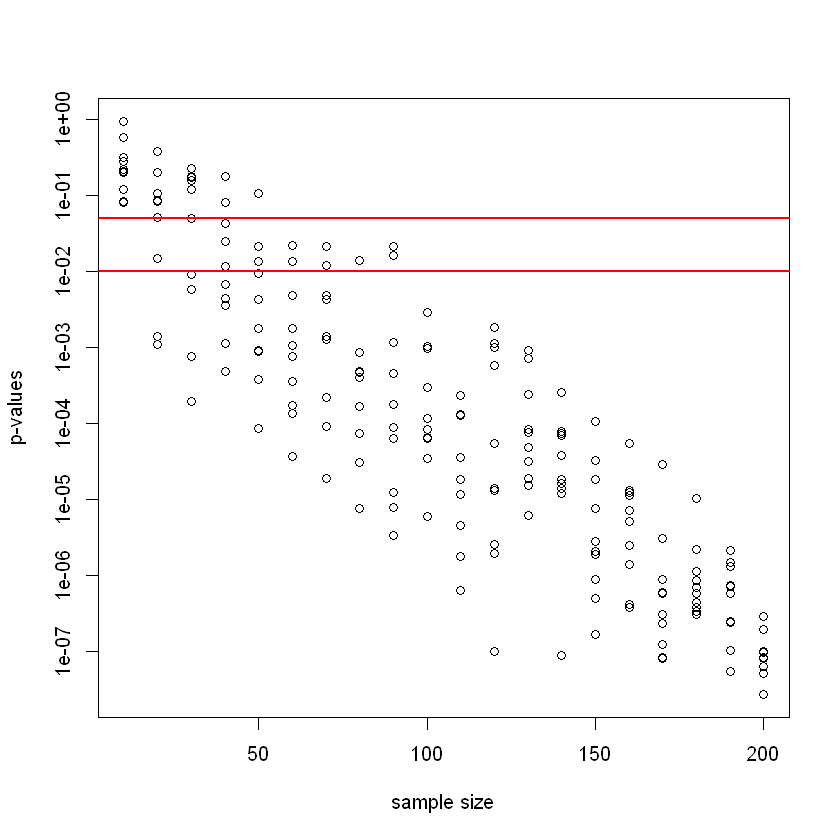

In [12]:
plot(Ns_rep, pvalues, log="y", xlab="sample size",
ylab="p-values")
abline(h=c(.01, .05), col="red", lwd=2)

In [13]:
N <- 12
hf <- sample(hfPopulation, N)
control <- sample(controlPopulation, N)
diff <- mean(hf) - mean(control)
diff / mean(control) * 100

[1] 5.196293

In [14]:
t.test(hf, control)$conf.int / mean(control) * 100

[1] -7.775307 18.167892
attr(,"conf.level")
[1] 0.95

In [15]:
sd_pool <- sqrt(((N-1)*var(hf) + (N-1)*var(control))/(2*N - 2))
diff / sd_pool

[1] 0.3397886

In [1]:
babies <- read.table("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\babies.txt", header=TRUE)

In [4]:
library(dplyr)
bwt.nonsmoke <- filter(babies, smoke==0) %>% select(bwt) %>% unlist
bwt.smoke <- filter(babies, smoke==1) %>% select(bwt) %>% unlist


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
library(rafalib)
mean(bwt.nonsmoke)-mean(bwt.smoke)
popsd(bwt.nonsmoke)
popsd(bwt.smoke)

[1] 8.937666

[1] 17.38696

[1] 18.08024

P73

Q1: Set the seed at 1 and obtain two samples, each of size N = 25, from non-smoking mothers
(dat.ns) and smoking mothers (dat.s). Compute the t-statistic (call it tval).

In [6]:
set.seed(1)
b1=sample(bwt.smoke, 25)
b2=sample(bwt.nonsmoke, 25)
t.test(b1,b2)


	Welch Two Sample t-test

data:  b1 and b2
t = -2.256, df = 36.806, p-value = 0.0301
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -22.931307  -1.228693
sample estimates:
mean of x mean of y 
   110.64    122.72 


In [7]:
tval=-2.256

Q2:Recall that we summarize our data using a t-statistics because we know that in situations where
the null hypothesis is true (what we mean when we say “under the null”) and the sample size
is relatively large, this t-value will have an approximate standard normal distribution. Because
we know the distribution of the t-value under the null, we can quantitatively determine how
unusual the observed t-value would be if the null hypothesis were true.

The standard procedure is to examine the probability a t-statistic that actually does follow the
null hypothesis would have larger absolute value than the absolute value of the t-value we
just observed – this is called a two-sided test.
We have computed these by taking one minus the area under the standard normal curve
between -abs(tval) and abs(tval). In R, we can do this by using the pnorm function, which
computes the area under a normal curve from negative infinity up to the value given as its
first argument:

In [8]:
pnorm(abs(tval))
pnorm(-abs(tval))

[1] 0.9879647

[1] 0.01203532

Q3: Because of the symmetry of the standard normal distribution, there is a simpler way to
calculate the probability that a t-value under the null could have a larger absolute value than
tval. Choose the simplified calculation from the following:

• A) 1-2*pnorm(abs(tval))

• B) 1-2*pnorm(-abs(tval))

• C) 1-pnorm(-abs(tval))

• D) 2*pnorm(-abs(tval))

In [9]:
1-2*pnorm(abs(tval))
1-2*pnorm(-abs(tval))
1-pnorm(-abs(tval))
2*pnorm(-abs(tval))

[1] -0.9759294

[1] 0.9759294

[1] 0.9879647

[1] 0.02407063

Q4: By reporting only p-values, many scientific publications provide an incomplete story of their
findings. As we have mentioned, with very large sample sizes, scientifically insignificant
differences between two groups can lead to small p-values. Confidence intervals are more
informative as they include the estimate itself. Our estimate of the difference between babies
of smoker and non-smokers: mean(dat.s) - mean( dat.ns). If we use the CLT, what quantity
would we add and subtract to this estimate to obtain a 99% confidence interval?

In [10]:
mean(bwt.smoke)-mean(bwt.nonsmoke)

[1] -8.937666

In [11]:
qstat=qnorm(0.5 + 0.99/2)
se=sqrt(var(bwt.nonsmoke)/25 + var(bwt.smoke)/25)
mean(bwt.smoke) - mean(bwt.nonsmoke) - qstat*se
mean(bwt.smoke) - mean(bwt.nonsmoke) + qstat*se

[1] -21.87116

[1] 3.995832

In [12]:
qstat*se

[1] 12.9335

Q5: If instead of CLT, we use the t-distribution approximation, what do we add and subtract (use
2*N-2 degrees of freedom)?

In [13]:
qstat1=qt(0.5 + 0.99/2, df = 25*2-2)
mean(bwt.smoke) - mean(bwt.nonsmoke) - qstat1*se
mean(bwt.smoke) - mean(bwt.nonsmoke) + qstat1*se

[1] -22.40528

[1] 4.52995

Q6: Why are the values from 4 and 5 so similar?

• A) Coincidence.

• B) They are both related to 99% confidence intervals.

• C) N and thus the degrees of freedom is large enough to make the normal and tdistributions very similar.

• D) They are actually quite different, differing by more than 1 ounce.

C freedom is large enough

Q7: Which of the following sentences about a Type I error is not true?

• A) The following is another way to describe a Type I error: you decided to reject the null
hypothesis on the basis of data that was actually generated by the null hypothesis.

• B) The following is the another way to describe a Type I error: due to random fluctuations,
even though the data you observed were actually generated by the null hypothesis, the
p-value calculated from the observed data was small, so you rejected it.

• C) From the original data alone, you can tell whether you have made a Type I error.

• D) In scientific practice, a Type I error constitutes reporting a “significant” result when
there is actually no result.

C

Q8: 

In the simulation we have set up here, we know the null hypothesis is false – the true value of
difference in means is actually around 8.9. Thus, we are concerned with how often the decision
rule outlined in the last section allows us to conclude that the null hypothesis is actually false.
In other words, we would like to quantify the Type II error rate of the test, or the probability
that we fail to reject the null hypothesis when the alternative hypothesis is true.
Unlike the Type I error rate, which we can characterize by assuming that the null hypothesis of
“no difference” is true, the Type II error rate cannot be computed by assuming the alternative
hypothesis alone because the alternative hypothesis alone does not specify a particular value
for the difference. It thus does not nail down a specific distribution for the t-value under the
alternative.
For this reason, when we study the Type II error rate of a hypothesis testing procedure, we need
to assume a particular effect size, or hypothetical size of the difference between population
means, that we wish to target. We ask questions such as “what is the smallest difference I
could reliably distinguish from 0 given my sample size N?” or, more commonly, “How big
does N have to be in order to detect that the absolute value of the difference is greater than
zero?” Type II error control plays a major role in designing data collection procedures before
you actually see the data, so that you know the test you will run has enough sensitivity or
power. Power is one minus the Type II error rate, or the probability that you will reject the
null hypothesis when the alternative hypothesis is true.
There are several aspects of a hypothesis test that affect its power for a particular effect size.
Intuitively, setting a lower α decreases the power of the test for a given effect size because the
null hypothesis will be more difficult to reject. This means that for an experiment with fixed
parameters (i.e., with a predetermined sample size, recording mechanism, etc), the power of
the hypothesis test trades off with its Type I error rate, no matter what effect size you target.
We can explore the trade off of power and Type I error concretely using the babies data. Since
we have the full population, we know what the true effect size is (about 8.93) and we can
compute the power of the test for true difference between populations.
Set the seed at 1 and take a random sample of N = 5 measurements from each of the smoking
and nonsmoking datasets. What is the p-value (use the t-test function)?

In [14]:
set.seed(1)
b11=sample(bwt.smoke, 5)
b21=sample(bwt.nonsmoke, 5)
t.test(b11,b21)$p.value

[1] 0.1336206

Q9: The p-value is larger than 0.05 so using the typical cut-off, we would not reject. This is a type
II error. Which of the following is not a way to decrease this type of error?

• A) Increase our chance of a type I error.

• B) Take a larger sample size.

• C) Find a population for which the null is not true.

• D) Use a higher α level.

C

Q10: Set the seed at 1, then use the replicate function to repeat the code used in exercise 9 10,000
times. What proportion of the time do we reject at the 0.05 level?

Q11: Note that, not surprisingly, the power is lower than 10%. Repeat the exercise above for samples
sizes of 30, 60, 90 and 120. Which of those four gives you power of about 80%?

In [18]:
f=function(N) {
  nss <- sample(bwt.nonsmoke, N)
  ss <- sample(bwt.smoke, N)
  pvalue <- t.test(nss, ss)$p.value
  return(pvalue)
}

n = c(30,60,90,120)
B = 10000
alpha = 0.05
res_list <- vector('double',length(n))
for (i in seq_along(n)) {
  res_list[[i]] = mean(replicate(B, f(n[[i]])) < alpha)
}
names(res_list) = n
print(res_list)

    30     60     90    120 
0.4801 0.7892 0.9359 0.9840 


90

Why can't I use for round to get the same result????

Q12: Repeat problem 11, but now require an α level of 0.01. Which of those four gives you power
of about 80%?

In [19]:
alpha = 0.01
res_list <- vector('double',length(n))
for (i in seq_along(n)) {
  res_list[[i]] = mean(replicate(B, f(n[[i]])) < alpha)
}
names(res_list) = n
print(res_list)

    30     60     90    120 
0.2428 0.5678 0.7935 0.9293 


120

# Monte Carlo Simulation

In [20]:
dat <- read.csv("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\mice_pheno.csv")
controlPopulation <- filter(dat,Sex == "F" & Diet == "chow") %>%
select(Bodyweight) %>% unlist

In [21]:
ttestgenerator <- function(n) {
cases <- sample(controlPopulation,n)
controls <- sample(controlPopulation,n)
tstat <- (mean(cases)-mean(controls)) /
sqrt( var(cases)/n + var(controls)/n )
return(tstat)
}
ttests <- replicate(1000, ttestgenerator(10))

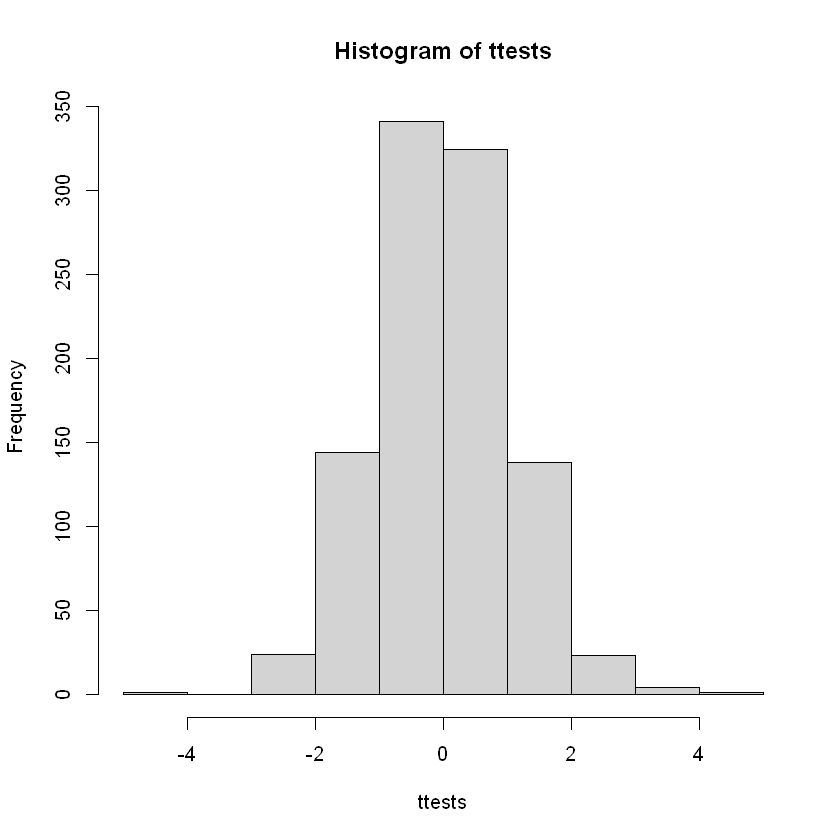

In [22]:
hist(ttests)

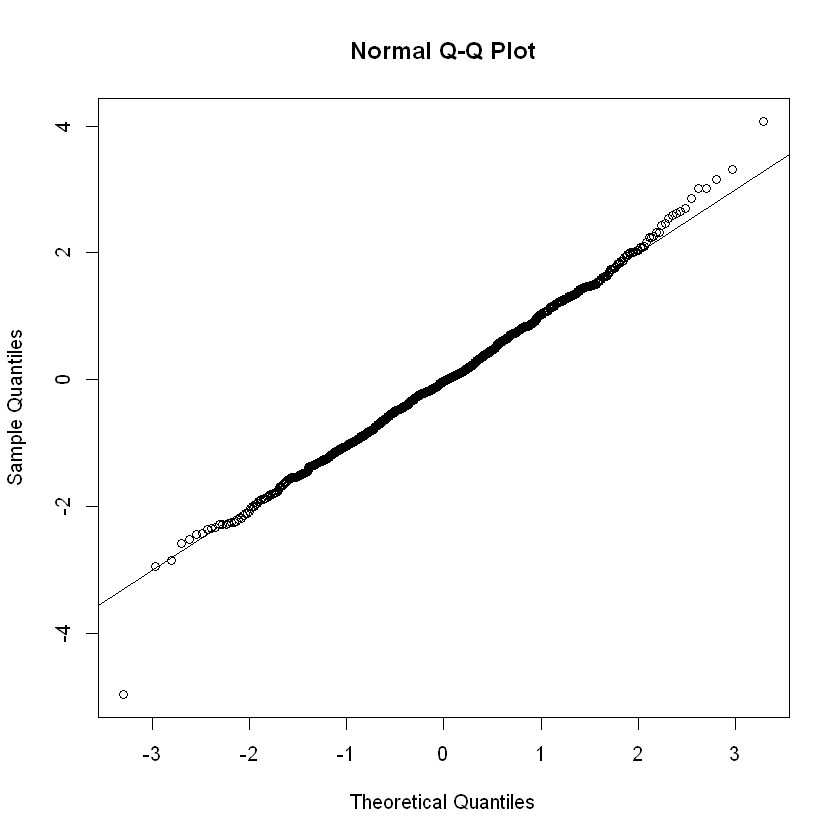

In [23]:
qqnorm(ttests)
abline(0,1)

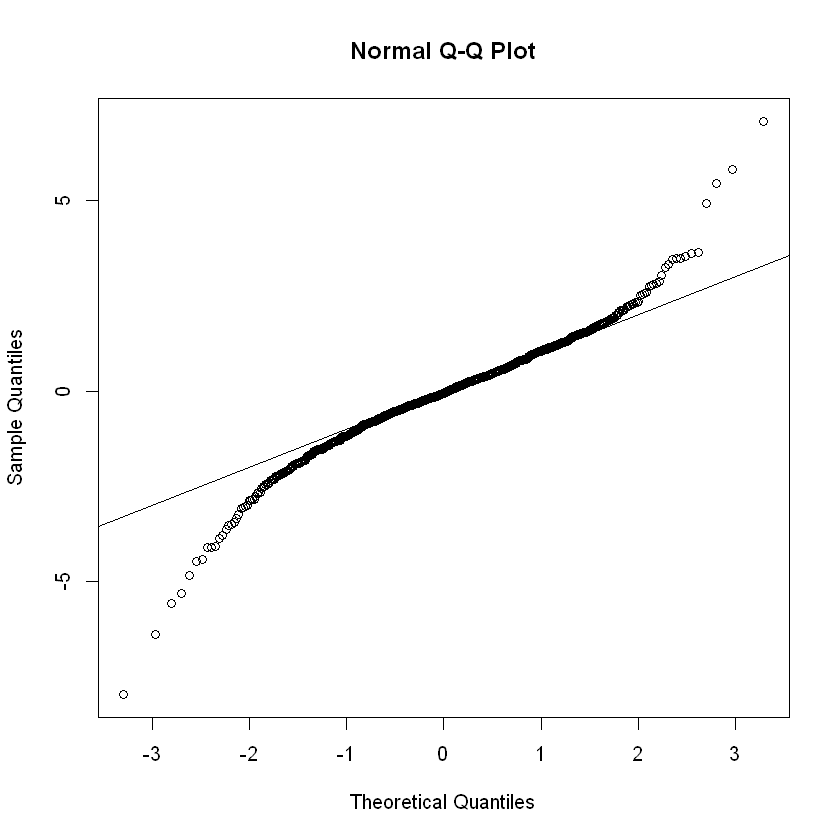

In [24]:
ttests <- replicate(1000, ttestgenerator(3))
qqnorm(ttests)
abline(0,1)

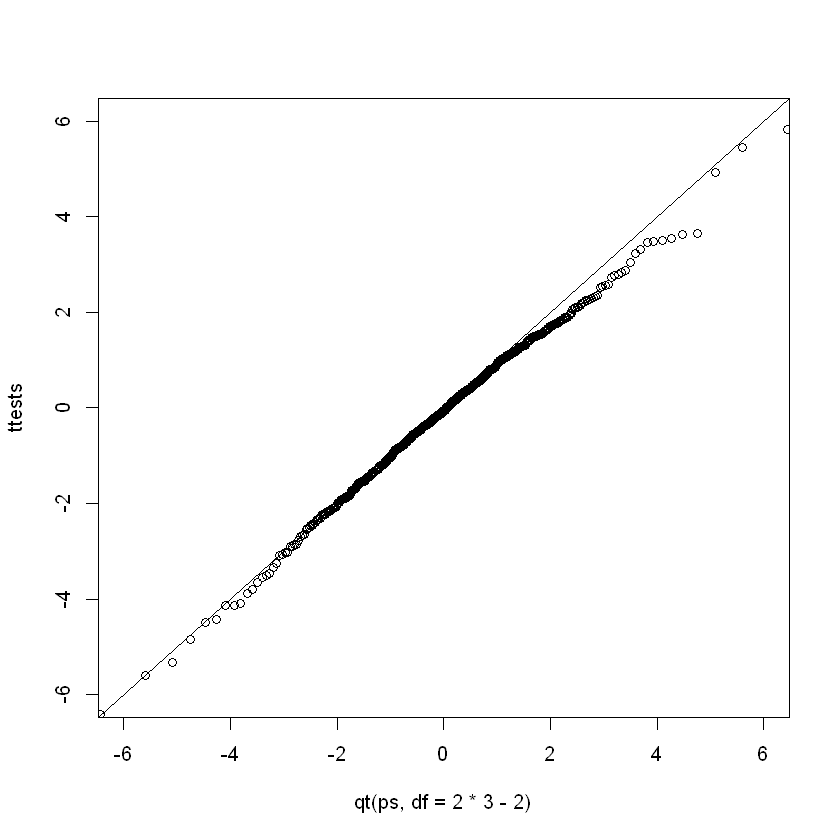

In [25]:
ps <- (seq(0,999)+0.5)/1000
qqplot(qt(ps,df=2*3-2),ttests,xlim=c(-6,6),ylim=c(-6,6))
abline(0,1)

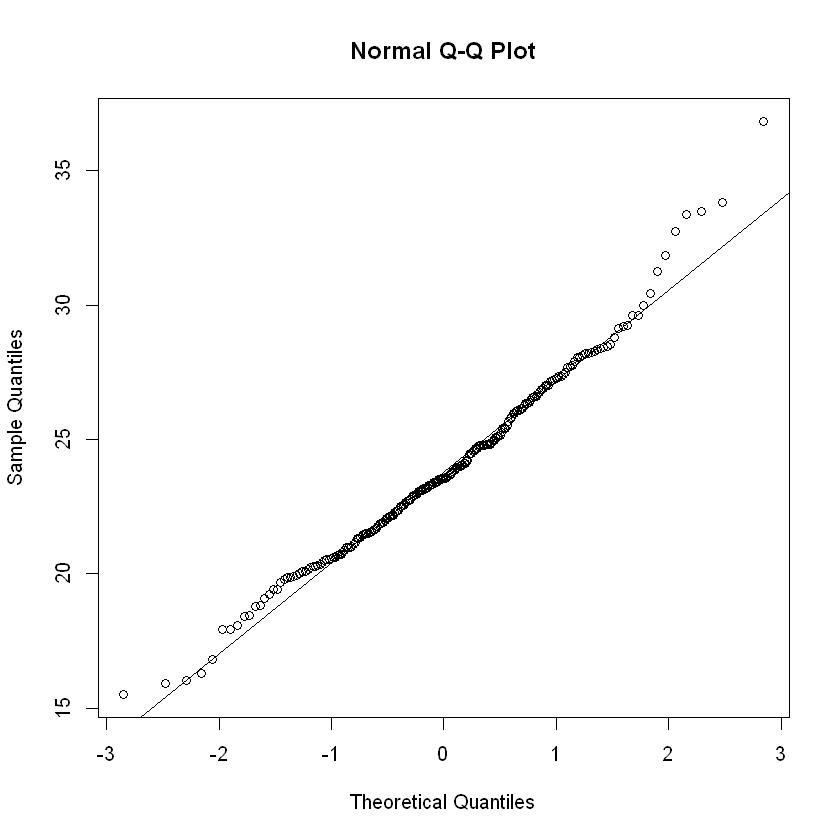

In [26]:
qqnorm(controlPopulation)
qqline(controlPopulation)

# Parametric Simulations for the Observations

In [1]:
controls<- rnorm(5000, mean=24, sd=3.5)
ttestgenerator <- function(n, mean=24, sd=3.5) {
cases <- rnorm(n,mean,sd)
controls <- rnorm(n,mean,sd)
tstat <- (mean(cases)-mean(controls)) /
sqrt( var(cases)/n + var(controls)/n )
return(tstat)
}

Exercises P 83

Q1

In [2]:
x=rnorm(5)
t= sqrt(5)*mean(x)/sd(x)
t

[1] 1.050561

Q2: Set the seed to 1, generate B = 1000 t-statistics as done in exercise 1. What percent are
larger than 2?

In [3]:
x=rnorm(1000)
t= sqrt(1000)*mean(x)/sd(x)
t

[1] -0.4051878

Q3

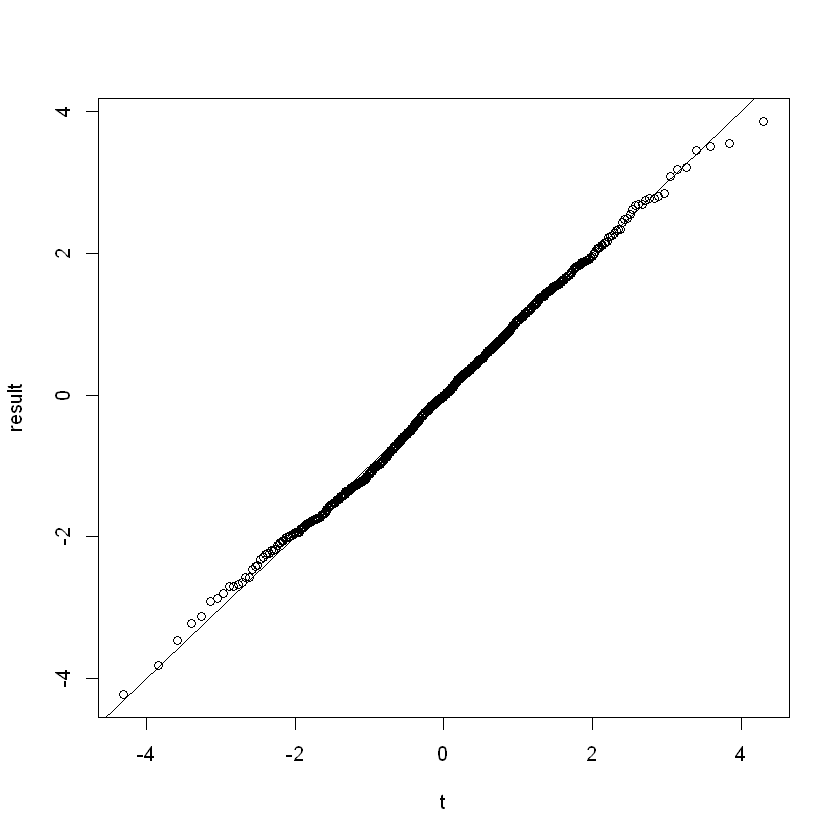

In [4]:
set.seed(1)
N=10
ps = seq(1/(1000+1), 1-1/(1000+1),len=1000)
f=function(n) {
  sam=rnorm(n)
  tstat=sqrt(n)*mean(sam)/sd(sam)
  return(tstat)
}
result=replicate(1000, f(N))
t= qt(ps,df=N-1)
qqplot(t, result)
abline(0,1)

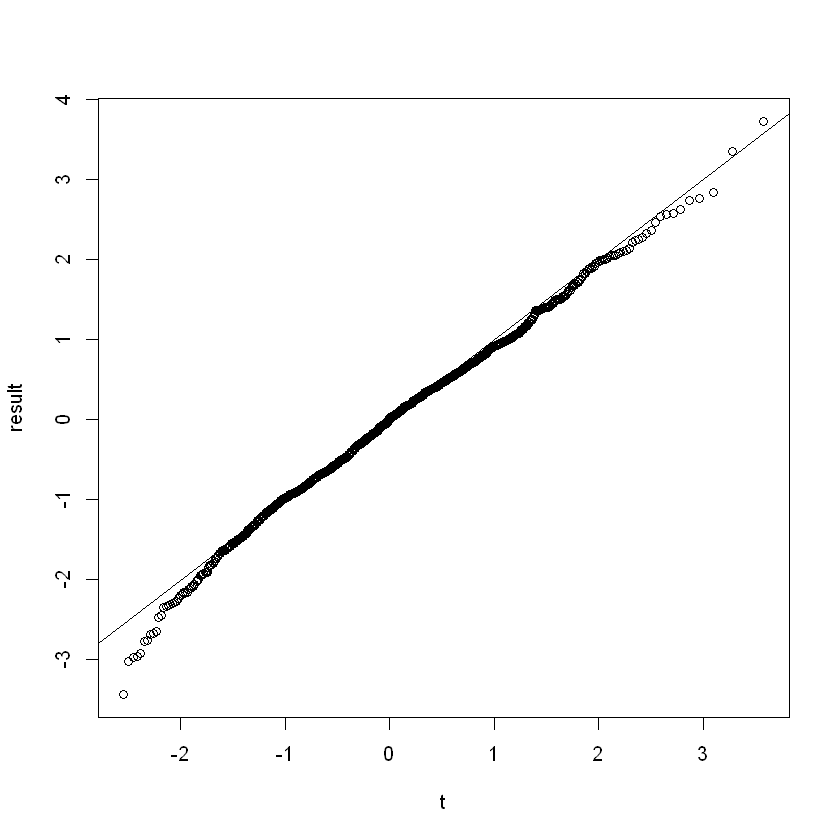

In [5]:
set.seed(1)
N=20
ps = seq(1/(100+1), 1-1/(1000+1),len=1000)
f=function(n) {
  sam=rnorm(n)
  tstat=sqrt(n)*mean(sam)/sd(sam)
  return(tstat)
}
result=replicate(1000, f(N))
t= qt(ps,df=N-1)
qqplot(t, result)
abline(0,1)

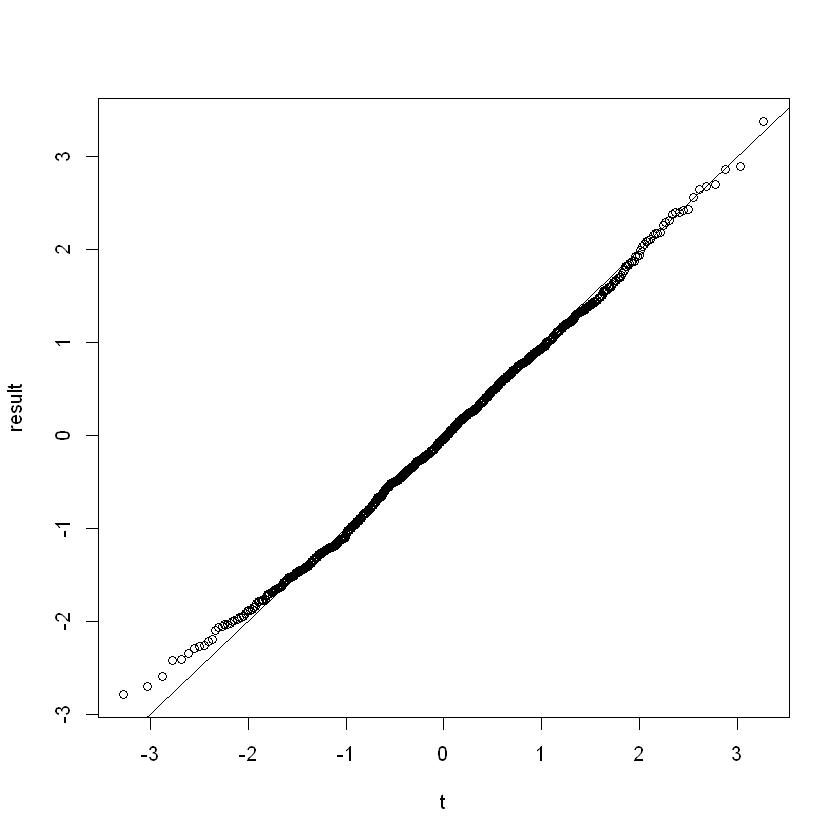

In [6]:
set.seed(1)
N=50
ps = seq(1/(1000+1), 1-1/(1000+1),len=1000)
f=function(n) {
  sam=rnorm(n)
  tstat=sqrt(n)*mean(sam)/sd(sam)
  return(tstat)
}
result=replicate(1000, f(N))
t= qt(ps,df=N-1)
qqplot(t, result)
abline(0,1)

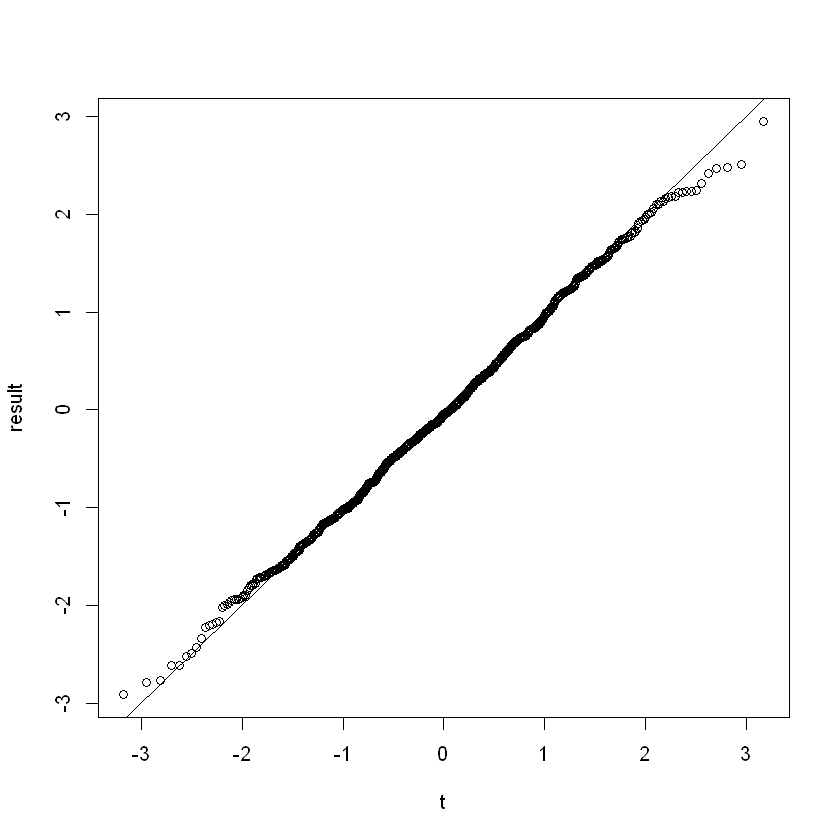

In [7]:
set.seed(1)
N=100
ps = seq(1/(1000+1), 1-1/(1000+1),len=1000)
f=function(n) {
  sam=rnorm(n)
  tstat=sqrt(n)*mean(sam)/sd(sam)
  return(tstat)
}
result=replicate(1000, f(N))
t= qt(ps,df=N-1)
qqplot(t, result)
abline(0,1)

C

Q4:Use Monte Carlo simulation to corroborate that the t-statistic comparing two means and
obtained with normally distributed (mean 0 and sd) data follows a t-distribution. In this
case we will use the t.test function with var.equal=TRUE. With this argument the degrees
of freedom will be df=2*N-2 with N the sample size. For which sample sizes does the
approximation best work?

• A) Larger sample sizes.

• B) Smaller sample sizes.

• C) The approximations are spot on for all sample sizes.

• D) None. We should use CLT instead.

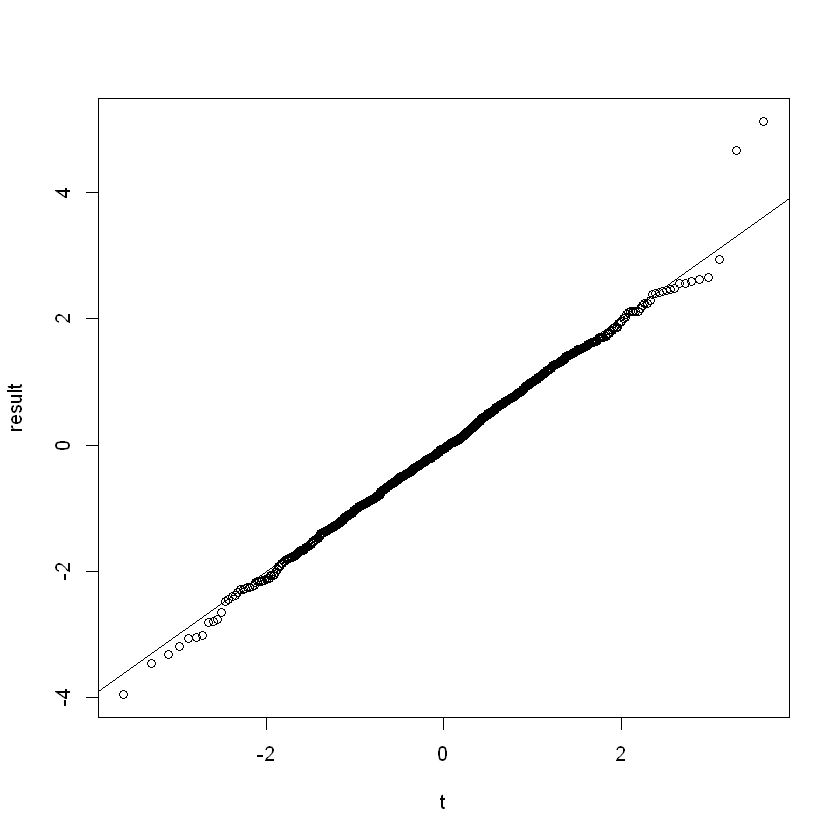

In [10]:
set.seed(1)
N=10
ps = seq(1/(1000+1), 1-1/(1000+1),len=1000)
f1=function(n) {
  sam1=rnorm(n)
  sam2=rnorm(n)
  tstat=t.test(sam1,sam2)$statistic[[1]]
  return(tstat)
}
result=replicate(1000, f1(N))
t= qt(ps,df=2*N-2)
qqplot(t, result)
abline(0,1)

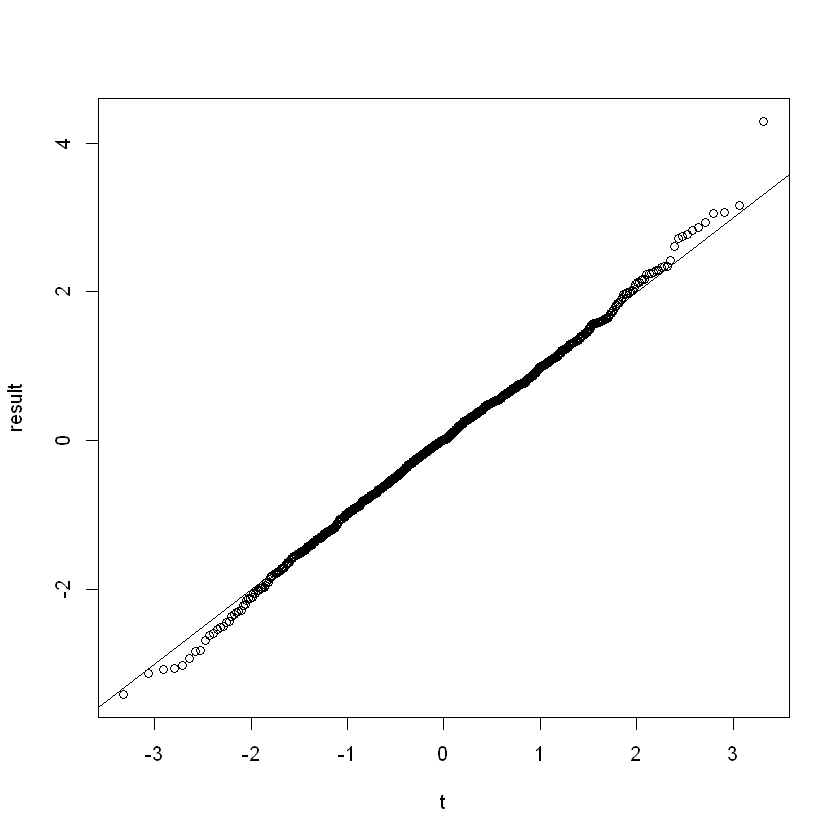

In [11]:
set.seed(1)
N=20
ps = seq(1/(1000+1), 1-1/(1000+1),len=1000)
f1=function(n) {
  sam1=rnorm(n)
  sam2=rnorm(n)
  tstat=t.test(sam1,sam2)$statistic[[1]]
  return(tstat)
}
result=replicate(1000, f1(N))
t= qt(ps,df=2*N-2)
qqplot(t, result)
abline(0,1)

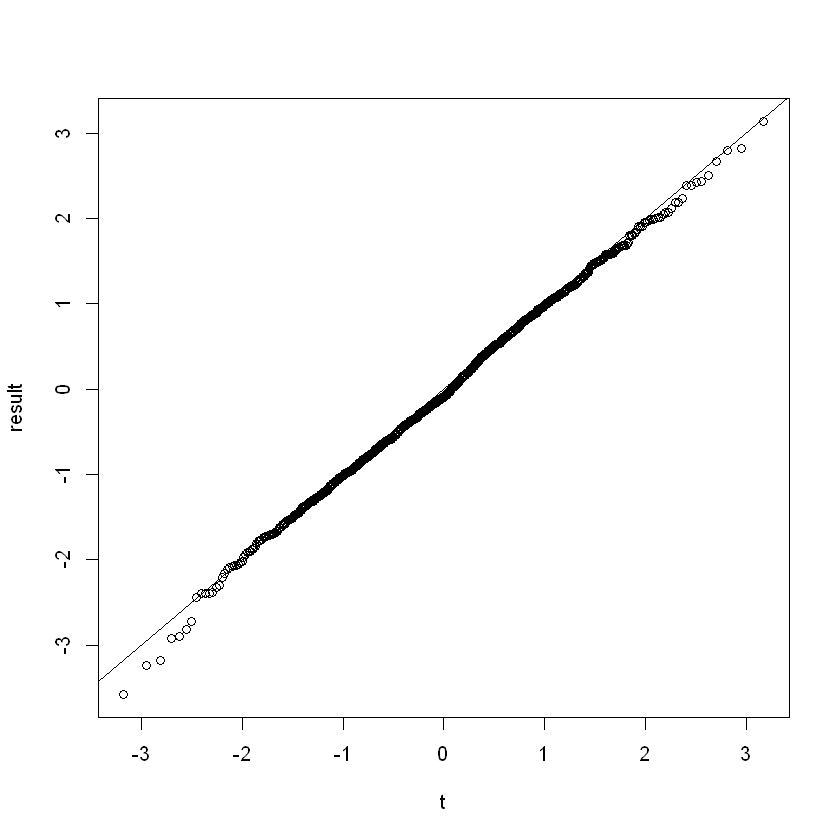

In [12]:
set.seed(1)
N=50
ps = seq(1/(1000+1), 1-1/(1000+1),len=1000)
f1=function(n) {
  sam1=rnorm(n)
  sam2=rnorm(n)
  tstat=t.test(sam1,sam2)$statistic[[1]]
  return(tstat)
}
result=replicate(1000, f1(N))
t= qt(ps,df=2*N-2)
qqplot(t, result)
abline(0,1)

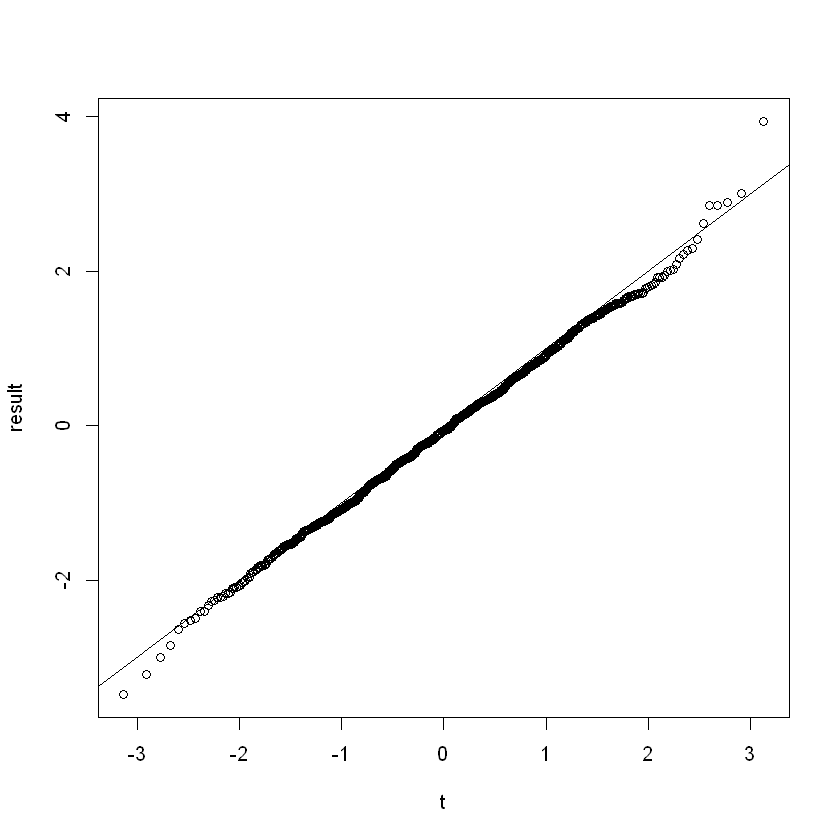

In [5]:
set.seed(1)
ps = seq(1/(1000+1), 1-1/(1000+1),len=1000)
N=100
ps = seq(1/(1000+1), 1-1/(1000+1),len=1000)
f1=function(n) {
  sam1=rnorm(n)
  sam2=rnorm(n)
  tstat=t.test(sam1,sam2)$statistic[[1]]
  return(tstat)
}
result=replicate(1000, f1(N))
t= qt(ps,df=2*N-2)
qqplot(t, result)
abline(0,1)

C

Q5:Is the following statement true or false? If instead of generating the sample with X=rnorm(15),
we generate it with binary data X=rbinom(n=15,size=1,prob=0.5) then the t-statistic

tstat <- sqrt(15)*mean(X) / sd(X)

is approximated by a t-distribution with 14 degrees of freedom

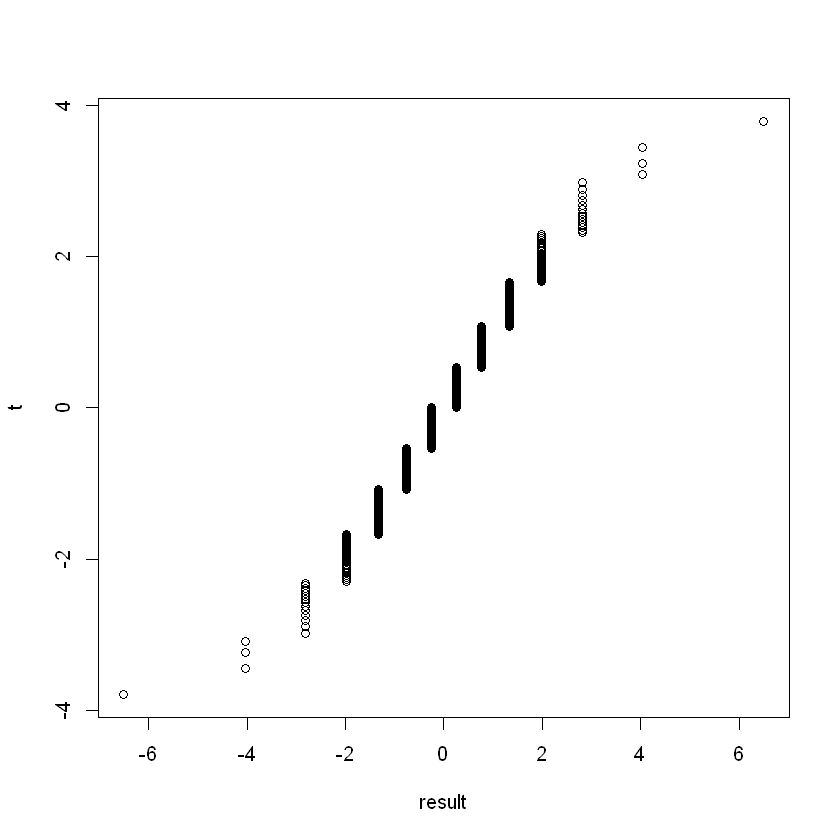

In [1]:
set.seed(1)
ps = seq(1/(1000+1), 1-1/(1000+1),len=1000)
result<- replicate(10000, {
    X=rbinom(n=15,size=1,prob=0.5)
    tstat=sqrt(15)*mean(X) / sd(X)
    return(tstat)
})
t <- qt(ps,df=14)
qqplot(result, t)

Q6: Is the following statement true or false? If instead of generating the sample with X=rnorm(N)
with N=500, we generate the data with binary data X=rbinom(n=500,size=1,prob=0.5), then
the t-statistic sqrt(N)*mean(X)/sd(X) is approximated by a t-distribution with 499 degrees of
freedom.

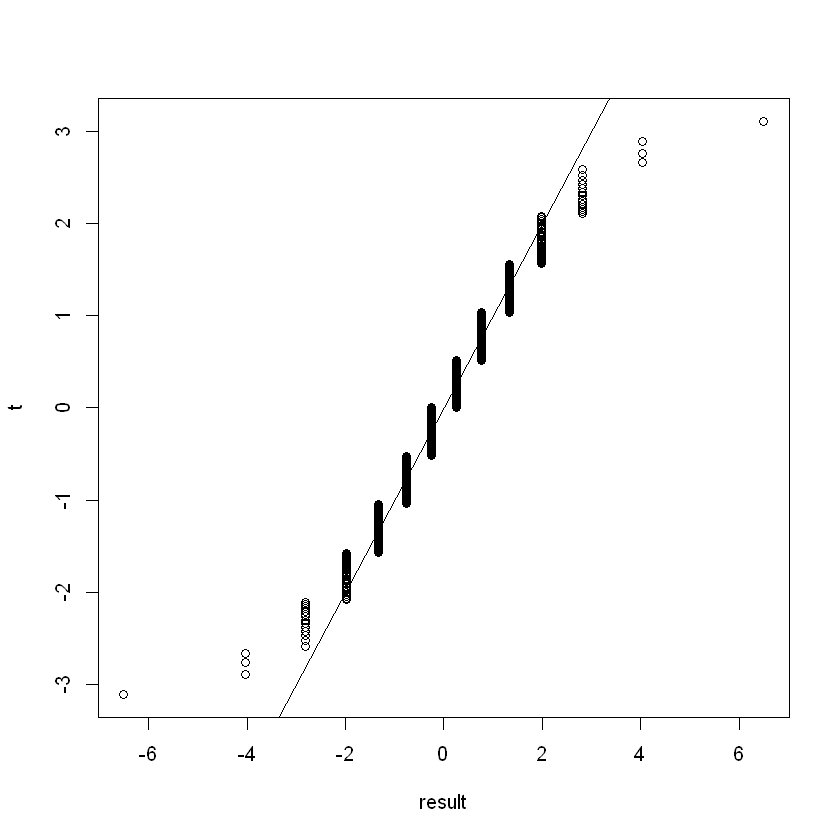

In [3]:
result1<- replicate(10000, {
    X=rbinom(n=500,size=1,prob=0.5)
    tstat=sqrt(500)*mean(X) / sd(X)
    return(tstat)
})
t <- qt(ps,df=499)
qqplot(result, t)
abline(0,1)

Q7: We can derive approximation of the distribution of the sample average or the t-statistic
theoretically. However, suppose we are interested in the distribution of a statistic for which a
theoretical approximation is not immediately obvious.
Consider the sample median as an example. Use a Monte Carlo to determine which of
the following best approximates the median of a sample taken from normally distributed
population with mean 0 and standard deviation 1.

• A) Just like for the average, the sample median is approximately normal with mean 0 and
SD $1/\sqrt{N}$

• B) The sample median is not approximately normal.
Inference 85

• C) The sample median is t-distributed for small samples and normally distributed for
large ones.

• D) The sample median is approximately normal with mean 0 and SD larger than $1/\sqrt{N}$

A 

Single Normal Population Sampling Distribution Theorem

# Permutation Tests

In [6]:
dat <- read.csv("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\femaleMiceWeights.csv")
library(dplyr)
control <- filter(dat,Diet=="chow") %>% select(Bodyweight) %>% unlist
treatment <- filter(dat,Diet=="hf") %>% select(Bodyweight) %>% unlist
obsdiff <- mean(treatment)-mean(control)

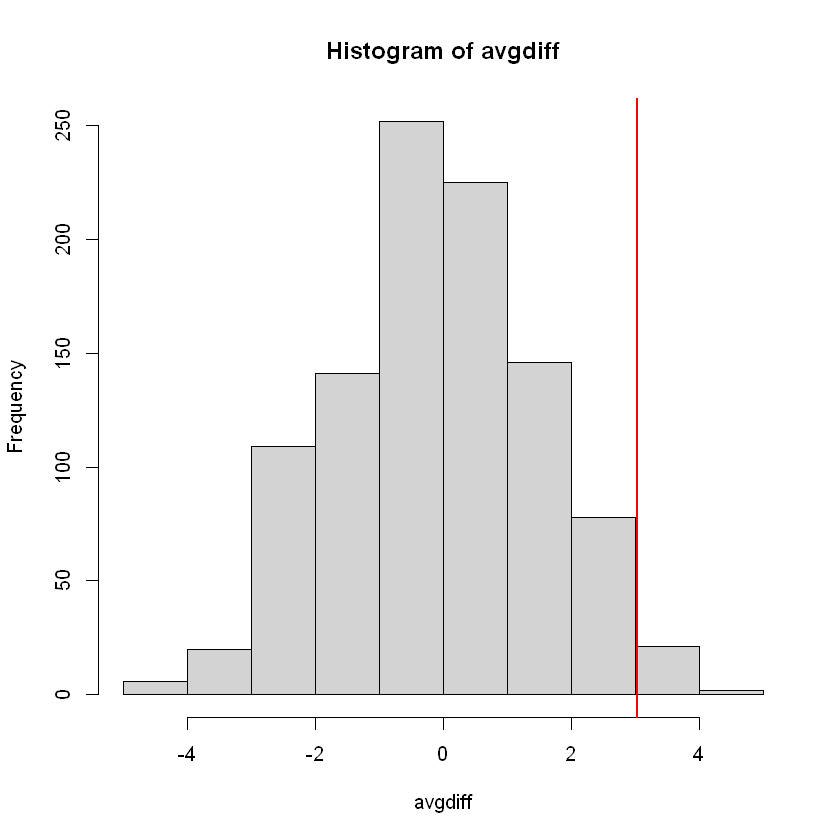

In [7]:
N <- 12
avgdiff <- replicate(1000, {
all <- sample(c(control,treatment))
newcontrols <- all[1:N]
newtreatments <- all[(N+1):(2*N)]
return(mean(newtreatments) - mean(newcontrols))
})
hist(avgdiff)
abline(v=obsdiff, col="red", lwd=2)

In [8]:
(sum(abs(avgdiff) > abs(obsdiff)) + 1) / (length(avgdiff) + 1)

[1] 0.04695305

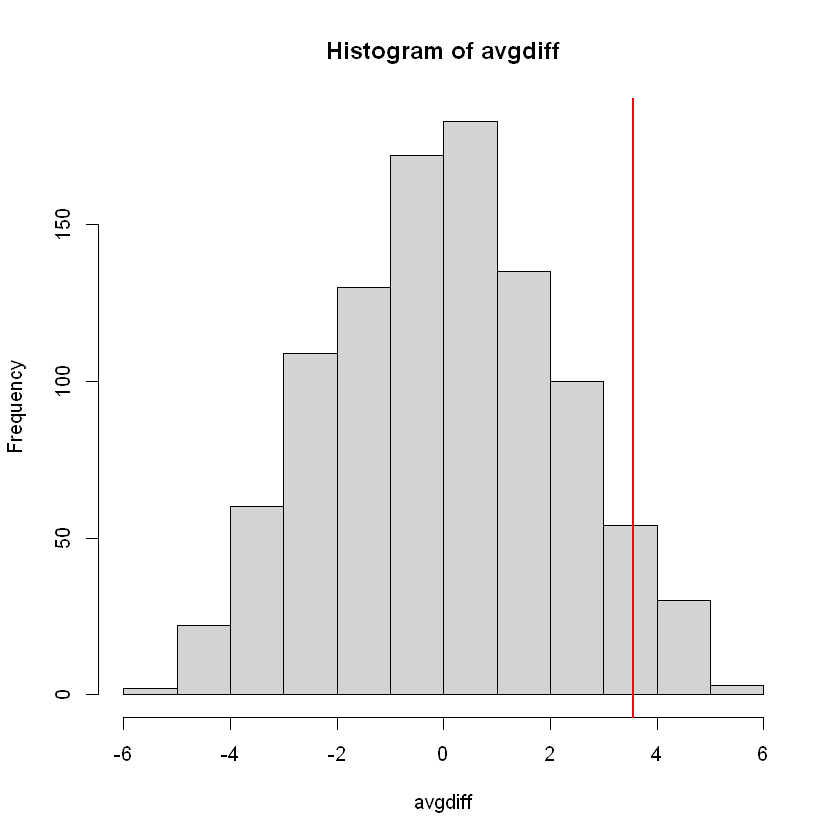

In [10]:
N <- 5
control <- sample(control,N)
treatment <- sample(treatment,N)
obsdiff <- mean(treatment)- mean(control)

avgdiff <- replicate(1000, {
all <- sample(c(control,treatment))
newcontrols <- all[1:N]
newtreatments <- all[(N+1):(2*N)]
return(mean(newtreatments) - mean(newcontrols))
})
hist(avgdiff)
abline(v=obsdiff, col="red", lwd=2)

In [1]:
library(dplyr)
babies <- read.table("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\babies.txt", header=TRUE)
bwt.nonsmoke <- filter(babies, smoke==0) %>% select(bwt) %>% unlist
bwt.smoke <- filter(babies, smoke==1) %>% select(bwt) %>% unlist


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
N=10
set.seed(1)
nonsmokers <- sample(bwt.nonsmoke , N)
smokers <- sample(bwt.smoke , N)
obs <- mean(smokers) - mean(nonsmokers)

The question is whether this observed difference is statistically significant. We do not want
to rely on the assumptions needed for the normal or t-distribution approximations to hold, so
instead we will use permutations. We will reshuffle the data and recompute the mean. We can
create one permuted sample with the following code:

In [3]:
dat <- c(smokers,nonsmokers)
shuffle <- sample( dat )
smokersstar <- shuffle[1:N]
nonsmokersstar <- shuffle[(N+1):(2*N)]
mean(smokersstar)-mean(nonsmokersstar)

[1] -9.5

The last value is one observation from the null distribution we will construct. Set the seed
at 1, and then repeat the permutation 1,000 times to create a null distribution. What is the
permutation derived p-value for our observation?

In [4]:
set.seed(1)
result <- replicate(1000, {
  dat <- c(smokers,nonsmokers)
  shuffle <- sample(dat)
  smokersstar <- shuffle[1:N]
  nonsmokersstar <- shuffle[(N+1):(2*N)]
  me <- mean(smokersstar) - mean(nonsmokersstar)
  return(me)
  
})

(sum(abs(result) > abs(obs)) +1)/(length(result)+1)

[1] 0.1108891

Q2:Repeat the above exercise, but instead of the differences in mean, consider the differences in
median obs <- median(smokers) - median(nonsmokers). What is the permutation based
p-value?

In [5]:
obs=median(smokers) - median(nonsmokers)
set.seed(1)
result <- replicate(1000, {
  dat <- c(smokers,nonsmokers)
  shuffle <- sample(dat)
  smokersstar <- shuffle[1:N]
  nonsmokersstar <- shuffle[(N+1):(2*N)]
  me <- median(smokersstar) - median(nonsmokersstar)
  return(me)
  
})

(sum(abs(result) > abs(obs)) +1)/(length(result)+1)

[1] 0.2147852

# Association Tests

In [6]:
tab <- matrix(c(3,1,1,3),2,2)
rownames(tab)<-c("Poured Before","Poured After")
colnames(tab)<-c("Guessed before","Guessed after")
tab

,Guessed before,Guessed after
Poured Before,3,1
Poured After,1,3


In [7]:
fisher.test(tab,alternative="greater")


	Fisher's Exact Test for Count Data

data:  tab
p-value = 0.2429
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 0.3135693       Inf
sample estimates:
odds ratio 
  6.408309 


In [8]:
disease=factor(c(rep(0,180),rep(1,20),rep(0,40),rep(1,10)),
labels=c("control","cases"))
genotype=factor(c(rep("AA/Aa",200),rep("aa",50)),
levels=c("AA/Aa","aa"))
dat <- data.frame(disease, genotype)
dat <- dat[sample(nrow(dat)),] #shuffle them up
head(dat)

,disease,genotype
,<fct>,<fct>
78,control,AA/Aa
135,control,AA/Aa
221,control,aa
231,control,aa
227,control,aa
238,control,aa


In [9]:
table(genotype)

genotype
AA/Aa    aa 
  200    50 

In [10]:
table(disease)

disease
control   cases 
    220      30 

In [11]:
tab <- table(genotype,disease)
tab

        disease
genotype control cases
   AA/Aa     180    20
   aa         40    10

In [12]:
(tab[2,2]/tab[2,1]) / (tab[1,2]/tab[1,1])

[1] 2.25

In [13]:
p=mean(disease=="cases") 
p

[1] 0.12

In [14]:
expected <- rbind(c(1-p,p)*sum(genotype=="AA/Aa"),
c(1-p,p)*sum(genotype=="aa"))
dimnames(expected)<-dimnames(tab)
expected

,control,cases
AA/Aa,176,24
aa,44,6


In [15]:
chisq.test(tab)$p.value

[1] 0.08857435

Large Samples, Small p-values

In [16]:
tab<-tab*10
chisq.test(tab)$p.value

[1] 1.219624e-09

Confidence Intervals For The Odd Ratio

In [17]:
fit <- glm(disease~genotype,family="binomial",data=dat)
coeftab<- summary(fit)$coef
coeftab

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-2.1972246,0.2356828,-9.322803,1.133070e-20
genotypeaa,0.8109302,0.4249074,1.908487,5.632834e-02


In [18]:
ci <- coeftab[2,1] + c(-2,2)*coeftab[2,2]
exp(ci)

[1] 0.9618616 5.2632310

P96

Q1: This dataframe reflects the allele status (either AA/Aa or aa) and the case/control status for
72 individuals. Compute the Chi-square test for the association of genotype with case/control
status (using the table function and the chisq.test function). Examine the table to see if there
appears to be an association. What is the X-squared statistic?

In [19]:
data=read.csv("D:\\desktop\\assoctest.csv")

In [20]:
table1=table(data)

In [21]:
chisq.test(table1)$statistic

X-squared 
 3.343653

Q2: Compute Fisher’s exact test fisher.test for the same table. What is the p-value?

In [22]:
fisher.test(table1)$p.value

[1] 0.05193834